Copyright (C) February 2023 Benjamin Thomas Schwertfeger   
Github: https://github.com/btschwertfeger

<h1 style="center">Performance test of the <a href="https://zenodo.org/record/7652734" target="_blank">BiasAdjustCXX v1.8</a> command-line tool</h1>
<h3 style="centter"> ... and comparison to <a href="https://zenodo.org/record/7535677" target="blank">xclim v0.40.0</a> and <a href="https://zenodo.org/record/7652756" target="_blank">python-cmethods v0.6.1</a></h3> 

___

<a name="introduction"></a>
# Introduction


There are many different tools for bias correction in climate data. One of these tools is `BiasAdjustCXX`, whose performance in terms of speed (execution time; i.e. the whole time between the program start until the end) will be examined in more detail. This notebook also serves as a guide for reproducing the results of these tests. Within this notebook scripts are called, which install the tool, generate test data and afterwards all procedures provided in `BiasAdjustCXX` (v1.8) are executed to adjust the generated data sets. 

To be able to compare this with something, the Python modules <a href="https://zenodo.org/record/7535677" target="blank">xclim</a> (v0.40.0) and <a href="https://zenodo.org/record/7652756" target="_blank">python-cmethods </a>(v0.6.1) are also used to measure their speed when applying the quantile mapping (QM) for `python-cmethods` and the quantile delta mapping (QDM) for both. Since all tools bring a variety of methods with them, but these differ both in terms of implementation and approach, only QM and QDM are tested here for `python-cmethods`. For the `xclim` module, only QDM is tested. 

____
<a name="tools"></a>
## Tools

Comparison of the speed performance of the bias correction tools: 
- [BiasAdjustCXX v1.8](https://zenodo.org/record/7652734) (C++ command-line tool)
- [python-cmethods v0.6.1](https://zenodo.org/record/7652756) (Python3 module)
- [xclim](https://zenodo.org/record/7535677) (Python3 module)

____

<a name="test-env"></a>
## Test environment and approach
This tests was run on MacBook Pro 13-inch 2017 (tests run in February of 2023)

with:

* Processor: 2.3 GHz Dual-Core Intel Core i5
* L2-Cache (per core): 256 KB
* L3-Cache: 4 MB
* Hyper-Threading Technology: enabled
* RAM: 8 GB 2133 MHz LPDDR3
* OS: MacOS Ventura 13.2.1
* Disk: 512 GB APPLE SSD AP0512J

All tests have been executed on the same machine. The scripts `scripts/test_performance_*.sh` were used for this purpose. The adjustments are executed using a minimal setup for all tools. The input data sets were randomly generated, this can be reproduced using the script `scripts/generate_test_data.py`. All datasets have exactly 10950 float values per grid cell, so this is comparable to 30 years of daily temperature values. A seed was set so that re-execution would generate the same data. 

All methods provided in the BiasAdjustCXX tool are tested. For `python-cmthods`, the corrections are only performed for the QM and QDM. For `xclim` only the QDM is used, because this is the only method with a comparable implementation in `BiasAdjustCXX` and `python-cmethods`. All methods are given the same parameters, that is, they are given the same input data sets and all distribution-based methods are given the value of 250 for the number of quantiles to be considered.

Data sets are generated, which contain a grid of 10x10, 20x20, 30x30, ..., 100x100 with 10950 values per grid cell. Since especially with the Python modules the time to load, prepare and correct a data set varies strongly despite seemingly equal starting-/preconditions, the data sets are corrected multiple times per tool. This provides a better overview of the outliers and also makes it possible to map an average value.

It has been found that the python modules have difficulty processing large datasets, for this reason only datasets with a resolution up to 60x60 are tested for these python modules. 

`BiasAdjustCXX` also offers the computation using multiple threads. This is als tested here.

#### Notes:
* In this tests, the data sets with a grid of 100x100 are about 836 MB in size ($T_{obs,h}$, $T_{sim,h}$ and $T_{sim,p}$ together thus 2.508 GB). A dataset with a resolution of 500x500 would therefore be 25 times larger ($100 \cdot 100 = 10000 \rightarrow 500 \cdot 500 = 250000$), i.e. 62.5 GB in total. Since I don't have this capacity at the time of writing, I don't currently have access to more powerful machines, and I'm making this supplement within 3 weeks besides of my regular work, the largest grid examined here is 100x100.
* The results of all tests can be foudn in the `performance_results` dirctory.
____
<a name="requirements"></a>
## Requirements

To run the python modules, python==3.10.18 is required, since this is the latest version, that `xclim` supports. It is recommended to create a virtual environment and install the requirements like this:

```bash
python3 -m venv test_performance_venv
source test_performance_venv/bin/activate
python3 -m pip install -r requirements.txt
``` 

For the compilation of [BiasAdjustCXX v1.8](https://zenodo.org/record/7652734) the following libraries and tools are needed:
* NetCDF-4 C library ([How to install NetCDF-4 C](https://docs.geoserver.org/stable/en/user/extensions/netcdf-out/nc4.html))
* CMake v3.10+ ([How to install CMake](https://cmake.org/install/))

The compilation can be done using:

Compilation:

```bash
mkdir build && cd build
cmake .. && cmake --build .
```
(... or see the README.md of [BiasAdjustCXX v1.8](https://zenodo.org/record/7652734))


____
<a name="disclaimer"></a>
## Disclaimer

* The scripts contained in this project/repository were created by Benjamin T. Schwertfeger in February 2023 and serve as a supplement to a manuscript introducing the command-line tool <a href="https://zenodo.org/record/7652734" target="_blank">BiasAdjustCXX v1.8</a>. This manuscript was submitted to the journal [SoftwareX](https://www.sciencedirect.com/journal/softwarex) in January 2023. 

* Errors and inaccuracies can happen. The tests performed here have been executed with the best of conscience. However, it is requested that you do not execute any of these scripts without understanding their contents. The author assumes no liability for errors, data loss, exploits or other damages caused by this code. 

____

<a name="toc"></a>
## Table of contents

1. [Download and compilation BiasAdjustCXX v1.8](#download-and-compile-biasadjustcxx)
2. [Generate test data sets](#generate-test-data-sets)
3. [Run the performance tests for BiasAdjustCXX v1.8, xclim v0.40.0 and python-cmethods v0.6.1](#run-perf-tests)
4. [Evaluation of the results](#evaluate-results)
    
    4.1 [Results of BiasAdjustCXX v1.8 (DM, LS, VS, QM, and QDM)](#evaluate-cxx)


    4.2 [Results of xclim v0.40.0 (QDM)](#evaluate-xclim)
    
    
    4.3 [Results of python-cmethods v0.6.1 (QM and QDM)](#evaluate-pycmethods)   
    
    
    4.4 [Comparison of the execution time of QDM](#comp-results)

5. [Conclusion](#conclusion)
___
<a name="abbrev"></a>
## Abbreviations

|Phrase|Definitiion|
|-----|------|
|DM|Delta Method|
|LS|Linear Scaling|
|VS|Variance Scaling|
|QM|Quantile Mapping|
|QDM|Quantile Delta Mapping|

____

<a name="references"></a>

## References

For further information regarding the mathematical basis of the correction procedures of `BiasAdjustCXX` I refer to the following articles:

* Linear Scaling and Variance Scaling based on: Teutschbein, Claudia and Seibert, Jan (2012) Bias correction of regional climate model simulations for hydrological climate-change impact studies: Review and evaluation of different methods (https://doi.org/10.1016/j.jhydrol.2012.05.052)
* Delta Method based on: Beyer, R. and Krapp, M. and Manica, A. (2020): An empirical evaluation of bias correction methods for palaeoclimate simulations (https://doi.org/10.5194/cp-16-1493-2020)
* Quantile Mapping based on: Alex J. Cannon and Stephen R. Sobie and Trevor Q. Murdock Bias Correction of GCM Precipitation by Quantile Mapping: How Well Do Methods Preserve Changes in Quantiles and Extremes? (https://doi.org/10.1175/JCLI-D-14-00754.1)
* Quantile Delta Mapping based on: Tong, Y., Gao, X., Han, Z. et al. Bias correction of temperature and precipitation over China for RCM simulations using the QM and QDM methods. Clim Dyn 57, 1425–1443 (2021). (https://doi.org/10.1007/s00382-020-05447-4)


____
<a name="download-and-compile-biasadjustcxx"></a>
## 1. Download and compile the BiasAdjustCXX tool (v1.8)

In [6]:
! ./scripts/install_BiasAdjustCXX.sh

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 2909k  100 2909k    0     0   953k      0  0:00:03  0:00:03 --:--:--  953k
yes: stdout: Broken pipe
-- The CXX compiler identification is Clang 12.0.0
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Check for working CXX compiler: /Users/benjamin/opt/miniconda3/bin/x86_64-apple-darwin13.4.0-clang++ - skipped
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- searching netCDFCxx...
-- Found netCDFCxx: /usr/local/lib/libnetcdf-cxx4.dylib  
-- netCDFCxx found!
-- Configuring done
-- Generating done
-- Build files have been written to: /Users/benjamin/repositories/awi-workspace/BiasAdjustCXX-Performance-Test/BiasAdjustCXX/build
[ 14%] Building CXX object CMakeFiles/BiasAdjustCXX.dir/src/main.cxx.o
[ 28%] Building CXX object CMakeFiles/BiasAdjustCXX.dir/src/CMethods.cxx.o
[

The BiasAdjustCXX tool is now compiled and can be executed.

____
<a name="generate-test-data-sets"></a>
## 2. Generate test data sets

In [ ]:
%%bash

# install the required python modules (if not done as described in the Requirements section)
# python3 -m pip install xarray numpy

# start generating the test data sets
mkdir -p input_data
python3 scripts/generate_test_data.py 

The following cells shows how such a generated data set can look like:

In [88]:
import xarray as xr 
xr.open_dataset('input_data/obsh-10x10.nc')

<xarray.Dataset>
Dimensions:  (time: 10950, lat: 10, lon: 10)
Coordinates:
  * time     (time) object 1971-01-01 00:00:00 ... 2000-12-31 00:00:00
  * lat      (lat) int64 0 1 2 3 4 5 6 7 8 9
  * lon      (lon) int64 0 1 2 3 4 5 6 7 8 9
Data variables:
    dummy    (time, lat, lon) float64 ...

____
<a name="run-perf-tests"></a>
## 3. Run the performance tests for `BiasAdjustCXX` v1.8, `xclim` v0.40.0 and `python-cmethods` v0.6.1

In case the `*.sh` files in `scripts` are not executable use the following command:

In [ ]:
# make the *.sh files executable
! cmod +x *.sh

The script `test_performance_BiasAdjustCXX.sh` executes all bias correction methods implemented in `BiasAdjustCXX` v1.8. This includes LS, VS, DM, QM, and QDM. 

The execution time for each grid resolution will be saved into the csv-file `performance_BiasAdjustCXX_method-<method-name>.csv`. Since `BiasAdjustCXX` offers the execution using multiple threads, besides the execution time in seconds, also the number of used threds (jobs) is saved. As mentioned in the approach section, the executions are tested 10 times each.

In [ ]:
# run the `BiasAdjustCXX` performance test
./scripts/test_performance_BiasAdjustCXX.sh

The following cell will execute the QDM procedure from the `xclim` module 10 times. The result (execution time in seconds) will be saved int the `performance_xclim_method-quantile_delta_mapping.csv` file. It executes the QDM for 10x10, 20x20, ... 60x60 grid cells with 10950 values each.

In [ ]:
# test QDM from the `xclim` module 
! ./scripts/test_performance_xclim_sdba.sh

The last script to test the tools is `test_performance_python-cmethods.sh` which executes QM and QDM for the resulutions 10x10, 20x20, 30x30, ..., 60x60 with 10950 values each, ten times. The results are stored in `performance_python-cmethods_method-quantile_delta_mapping.csv` and `performance_python-cmethods_method-quantile_mapping.csv`.

In [ ]:
# test QM and QDM from the `python-cmethods` module
! ./scripts/test_performance_python-cmethods.sh

Now that all tests have been completed, various csv files exist in the directory `performance_results`. These will be read in and visualized in the following.

____
<a name="evaluate-results"></a>
## 4. Evaluation of the results

This section deals with the visualization of the results from the previous tests. For this purpose, the csv data is read in and then compared separately for each tool and finally all together.

In [16]:
# install required modules ...
# ! python3 -m pip install pandas matplotlib #...

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
import xarray as xr
import warnings
import numpy as np
warnings.filterwarnings('ignore')

In [2]:
path = 'performance_results'
# Results from the performance tests of BiasAdjustCXX 
cxx_dm = pd.read_csv(f'{path}/performance_BiasAdjustCXX_method-delta_method.csv')
cxx_ls = pd.read_csv(f'{path}/performance_BiasAdjustCXX_method-linear_scaling.csv')
cxx_vs = pd.read_csv(f'{path}/performance_BiasAdjustCXX_method-variance_scaling.csv')
cxx_qm = pd.read_csv(f'{path}/performance_BiasAdjustCXX_method-quantile_mapping.csv')
cxx_qdm = pd.read_csv(f'{path}/performance_BiasAdjustCXX_method-quantile_delta_mapping.csv')

# Results from the performance tests of `python-cmethods` Quantile Mapping (QM) and Quantile Delta Mapping (QDM)
pycmethods_qm = pd.read_csv(f'{path}/performance_python-cmethods_method-quantile_mapping.csv')
pycmethods_qdm = pd.read_csv(f'{path}/performance_python-cmethods_method-quantile_delta_mapping.csv')

# Result from the performance test of `xclim` Quantile Delta Mapping (QDM)
xclim_qdm = pd.read_csv(f'{path}/performance_xclim_method-quantile_delta_mapping.csv')

<a name="evaluate-cxx"></a>
### 4.1 Results of BiasAdjustCXX v1.8 (DM, LS, VS, QM, and QDM)

Each bias correction method implemented in `BiasAdjustCXX` (v1.8) was executed with 1-4 threads 10 times each for the resolutions of 10x10, 20x20, 30x30, ... 100x100. 

But first, two functions for plotting are defined:

In [42]:
def plot_multiple_threds(data: pd.DataFrame, method: str) -> None:
    ''' Plots 4 lines, each representing the execution time
        for different resolutions and number of threads
    '''
    plt.figure(figsize=(10,5), dpi=300)

    ax = plt.gca()
    for job in range(4):
        l1 = data.where(data['jobs'] == job).groupby('resolution').quantile(.5)
        l1 = l1.tail(-1).append(l1.head(1))
        l1.plot(y='time (seconds)', ax=ax, label=f'{job} job(s)')

    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.set_xticklabels([f'{x}x{x}' for x in range(0,101,10)])
    plt.grid(alpha=.2)

    plt.ylabel('execution time (seconds)')
    plt.xlabel('spatial grid resolution')
    plt.legend()
    plt.title(f'Mean execution time of BiasAdjustcXX applied 10 times to 30 years of daily test temperature values\n\
        (10950 time steps per grid cell) using {method}');

In [74]:
def plot_1thread_quantile(data: pd.DataFrame, method: str) -> None:
    ''' Plots 3 lines, representing the 0.25, 0.5 and 0.75 Quantile
        of the data while only respecting entries that used 1 thread.        
    '''
    plt.figure(figsize=(10,5), dpi=300)

    ax = plt.gca()

    # get entries where jobs == 1
    data_1job = data.where(data['jobs'] == 1)
    data_q25 = data_1job.groupby('resolution').quantile(.25)
    data_q25 = data_q25.tail(-1).append(data_q25.iloc[0])

    data_q50 = data_1job.groupby('resolution').quantile(.5)
    data_q50 = data_q50.tail(-1).append(data_q50.iloc[0])

    data_q75 = data_1job.groupby('resolution').quantile(.75)
    data_q75 = data_q75.tail(-1).append(data_q75.iloc[0])

    y = 'time (seconds)'
    data_q25[y].plot(ax=ax, color='red', alpha=.5)
    data_q50[y].plot(ax=ax, color='black')
    data_q75[y].plot(ax=ax, color='red', alpha=.5)

    ax.fill_between(np.arange(0,10,1),list(data_q25[y]), list(data_q75[y]), color='red', alpha=.2)
    ax.legend([ '$Q_{0.25}$', '$Q_{0.5}$', '$Q_{0.75}$' ]);

    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.set_xticklabels([f'{x}x{x}' for x in range(0,101,10)])
    plt.grid(alpha=.2)

    plt.ylabel('execution time (seconds)')
    plt.xlabel('spatial grid resolution')
    plt.title(f'BiasAdjustCXX applied 10 times to 30 years of daily test temperature values\n (10950 time steps per grid cell) using {method} (1 thread)');

#### BiasAdjustCXX: Delta Method

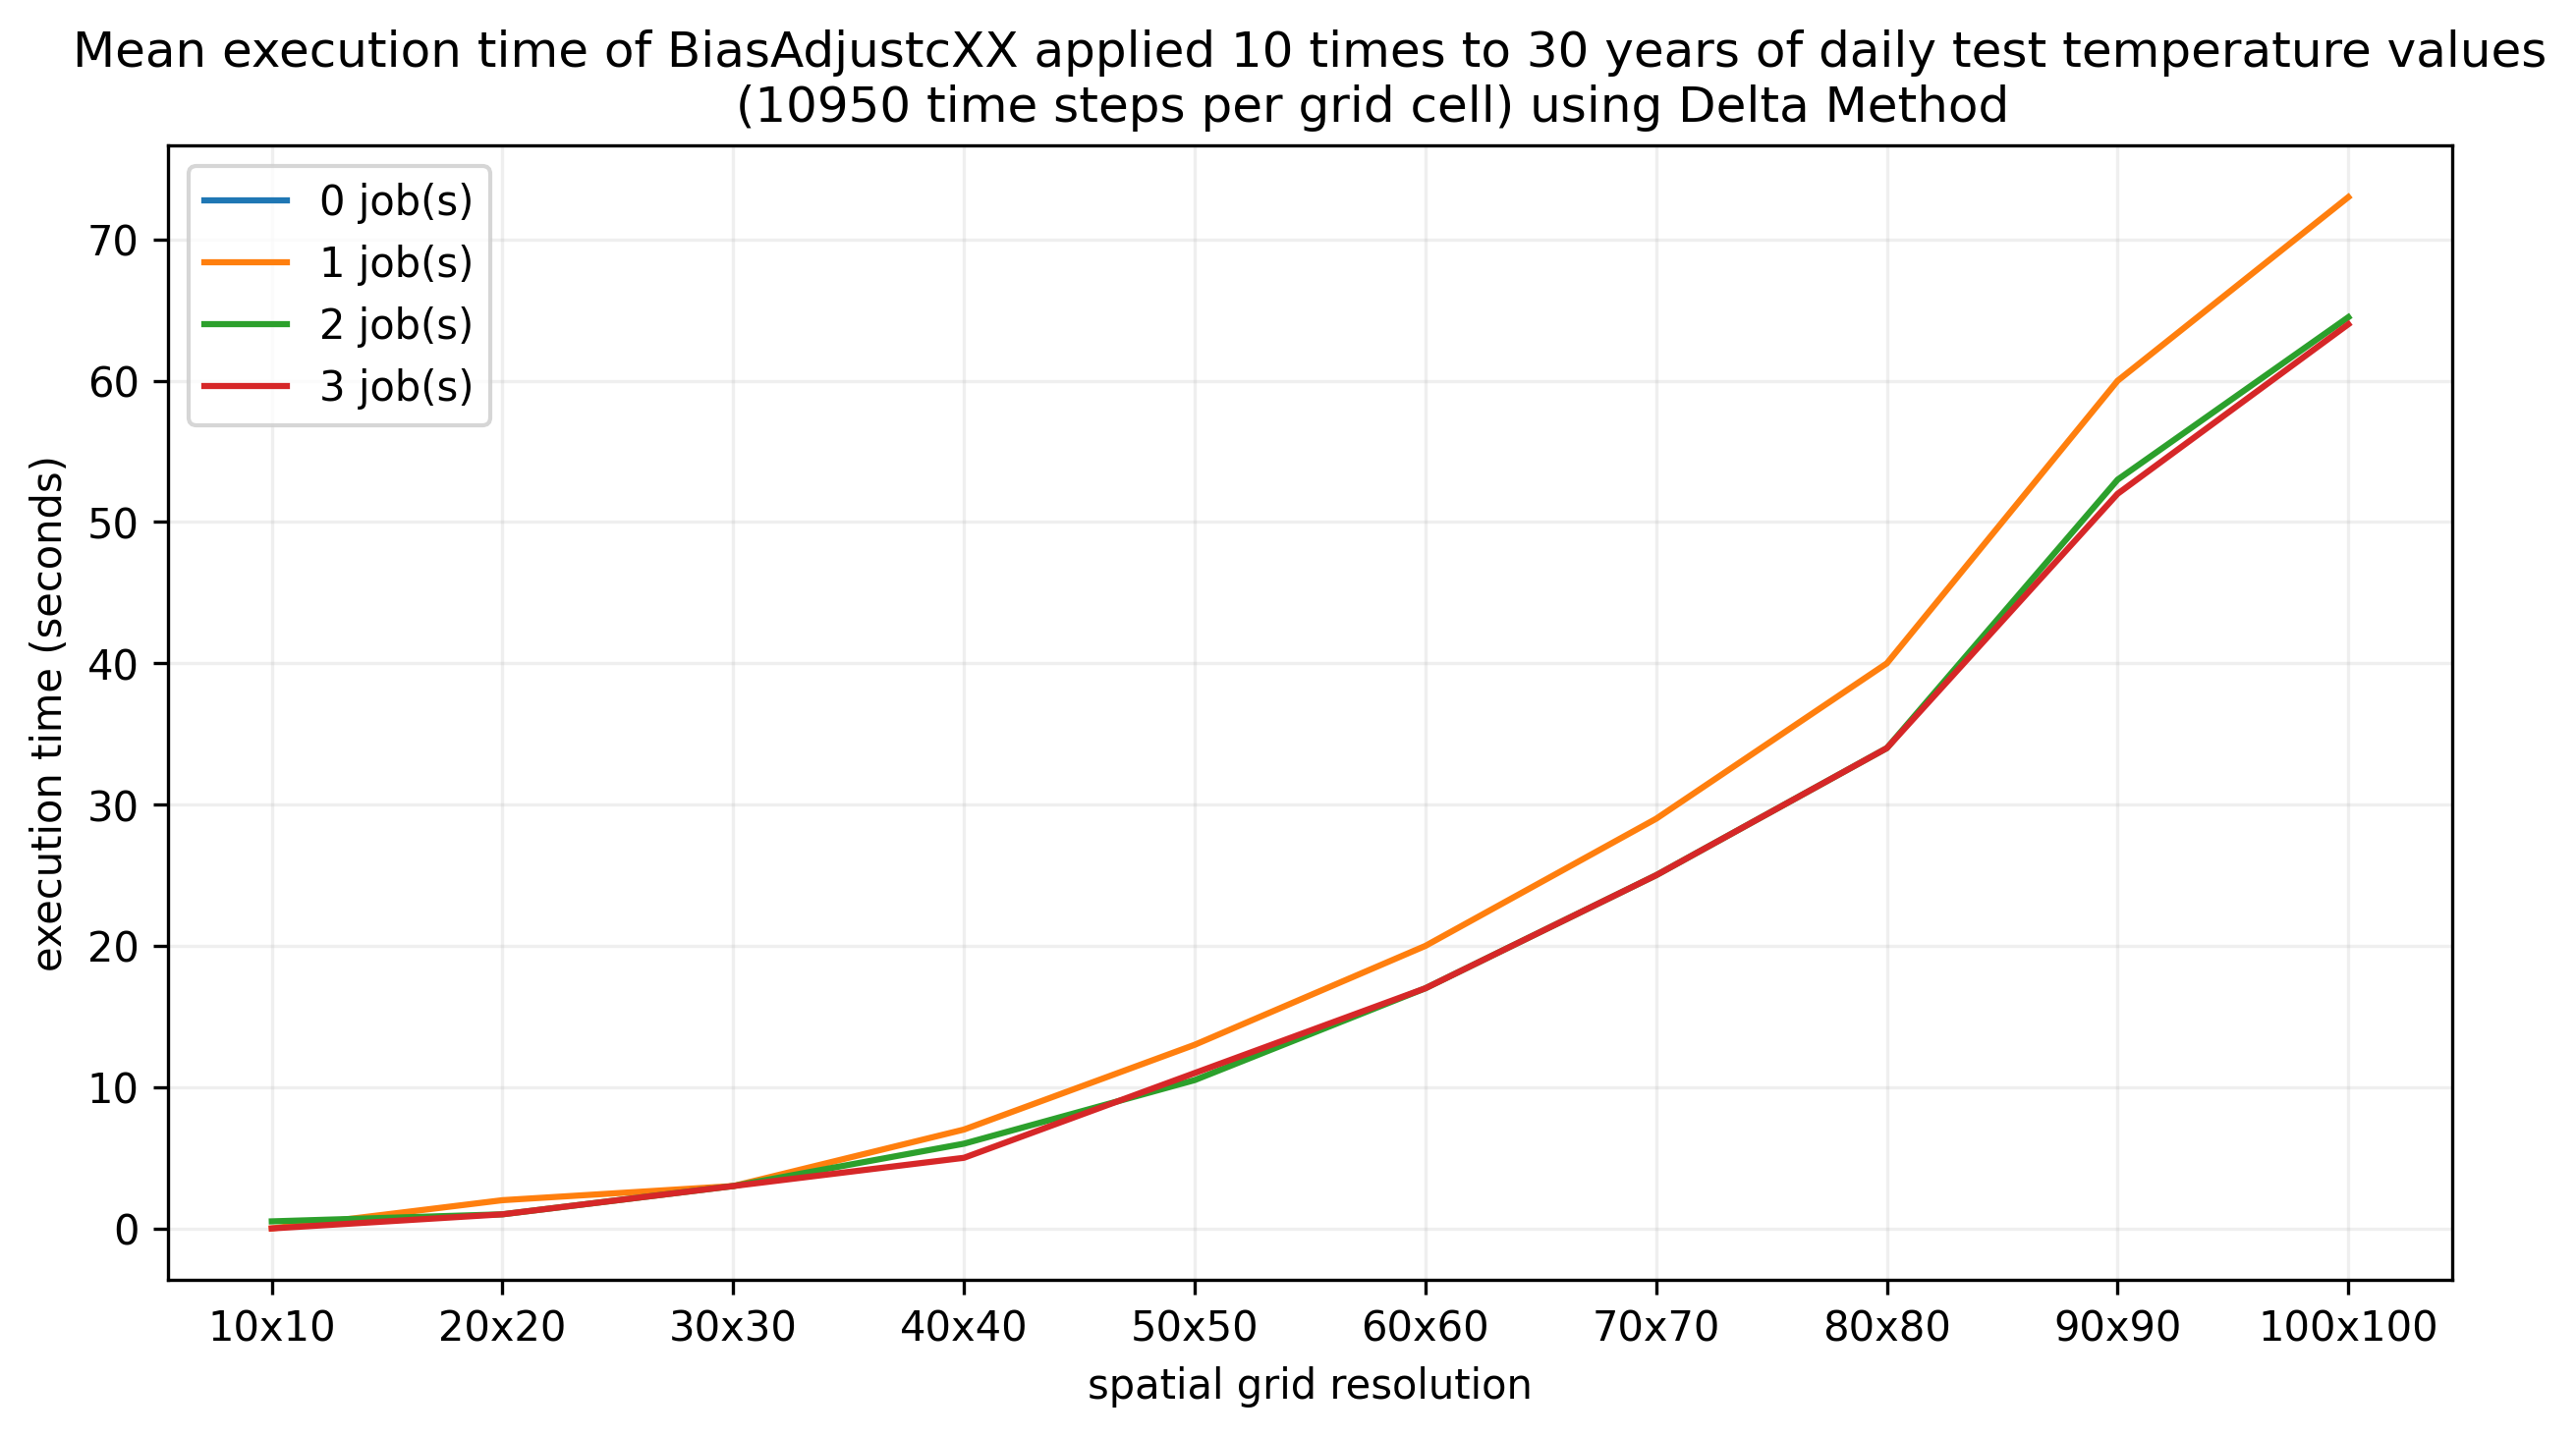

In [43]:
plot_multiple_threds(data=cxx_dm, method='Delta Method')

Here as well as on the plots below can be seen, that the execution time is reducing when having multiple jobs, but not as much as espected. This is maybe because the tests are run on a dual core processor.

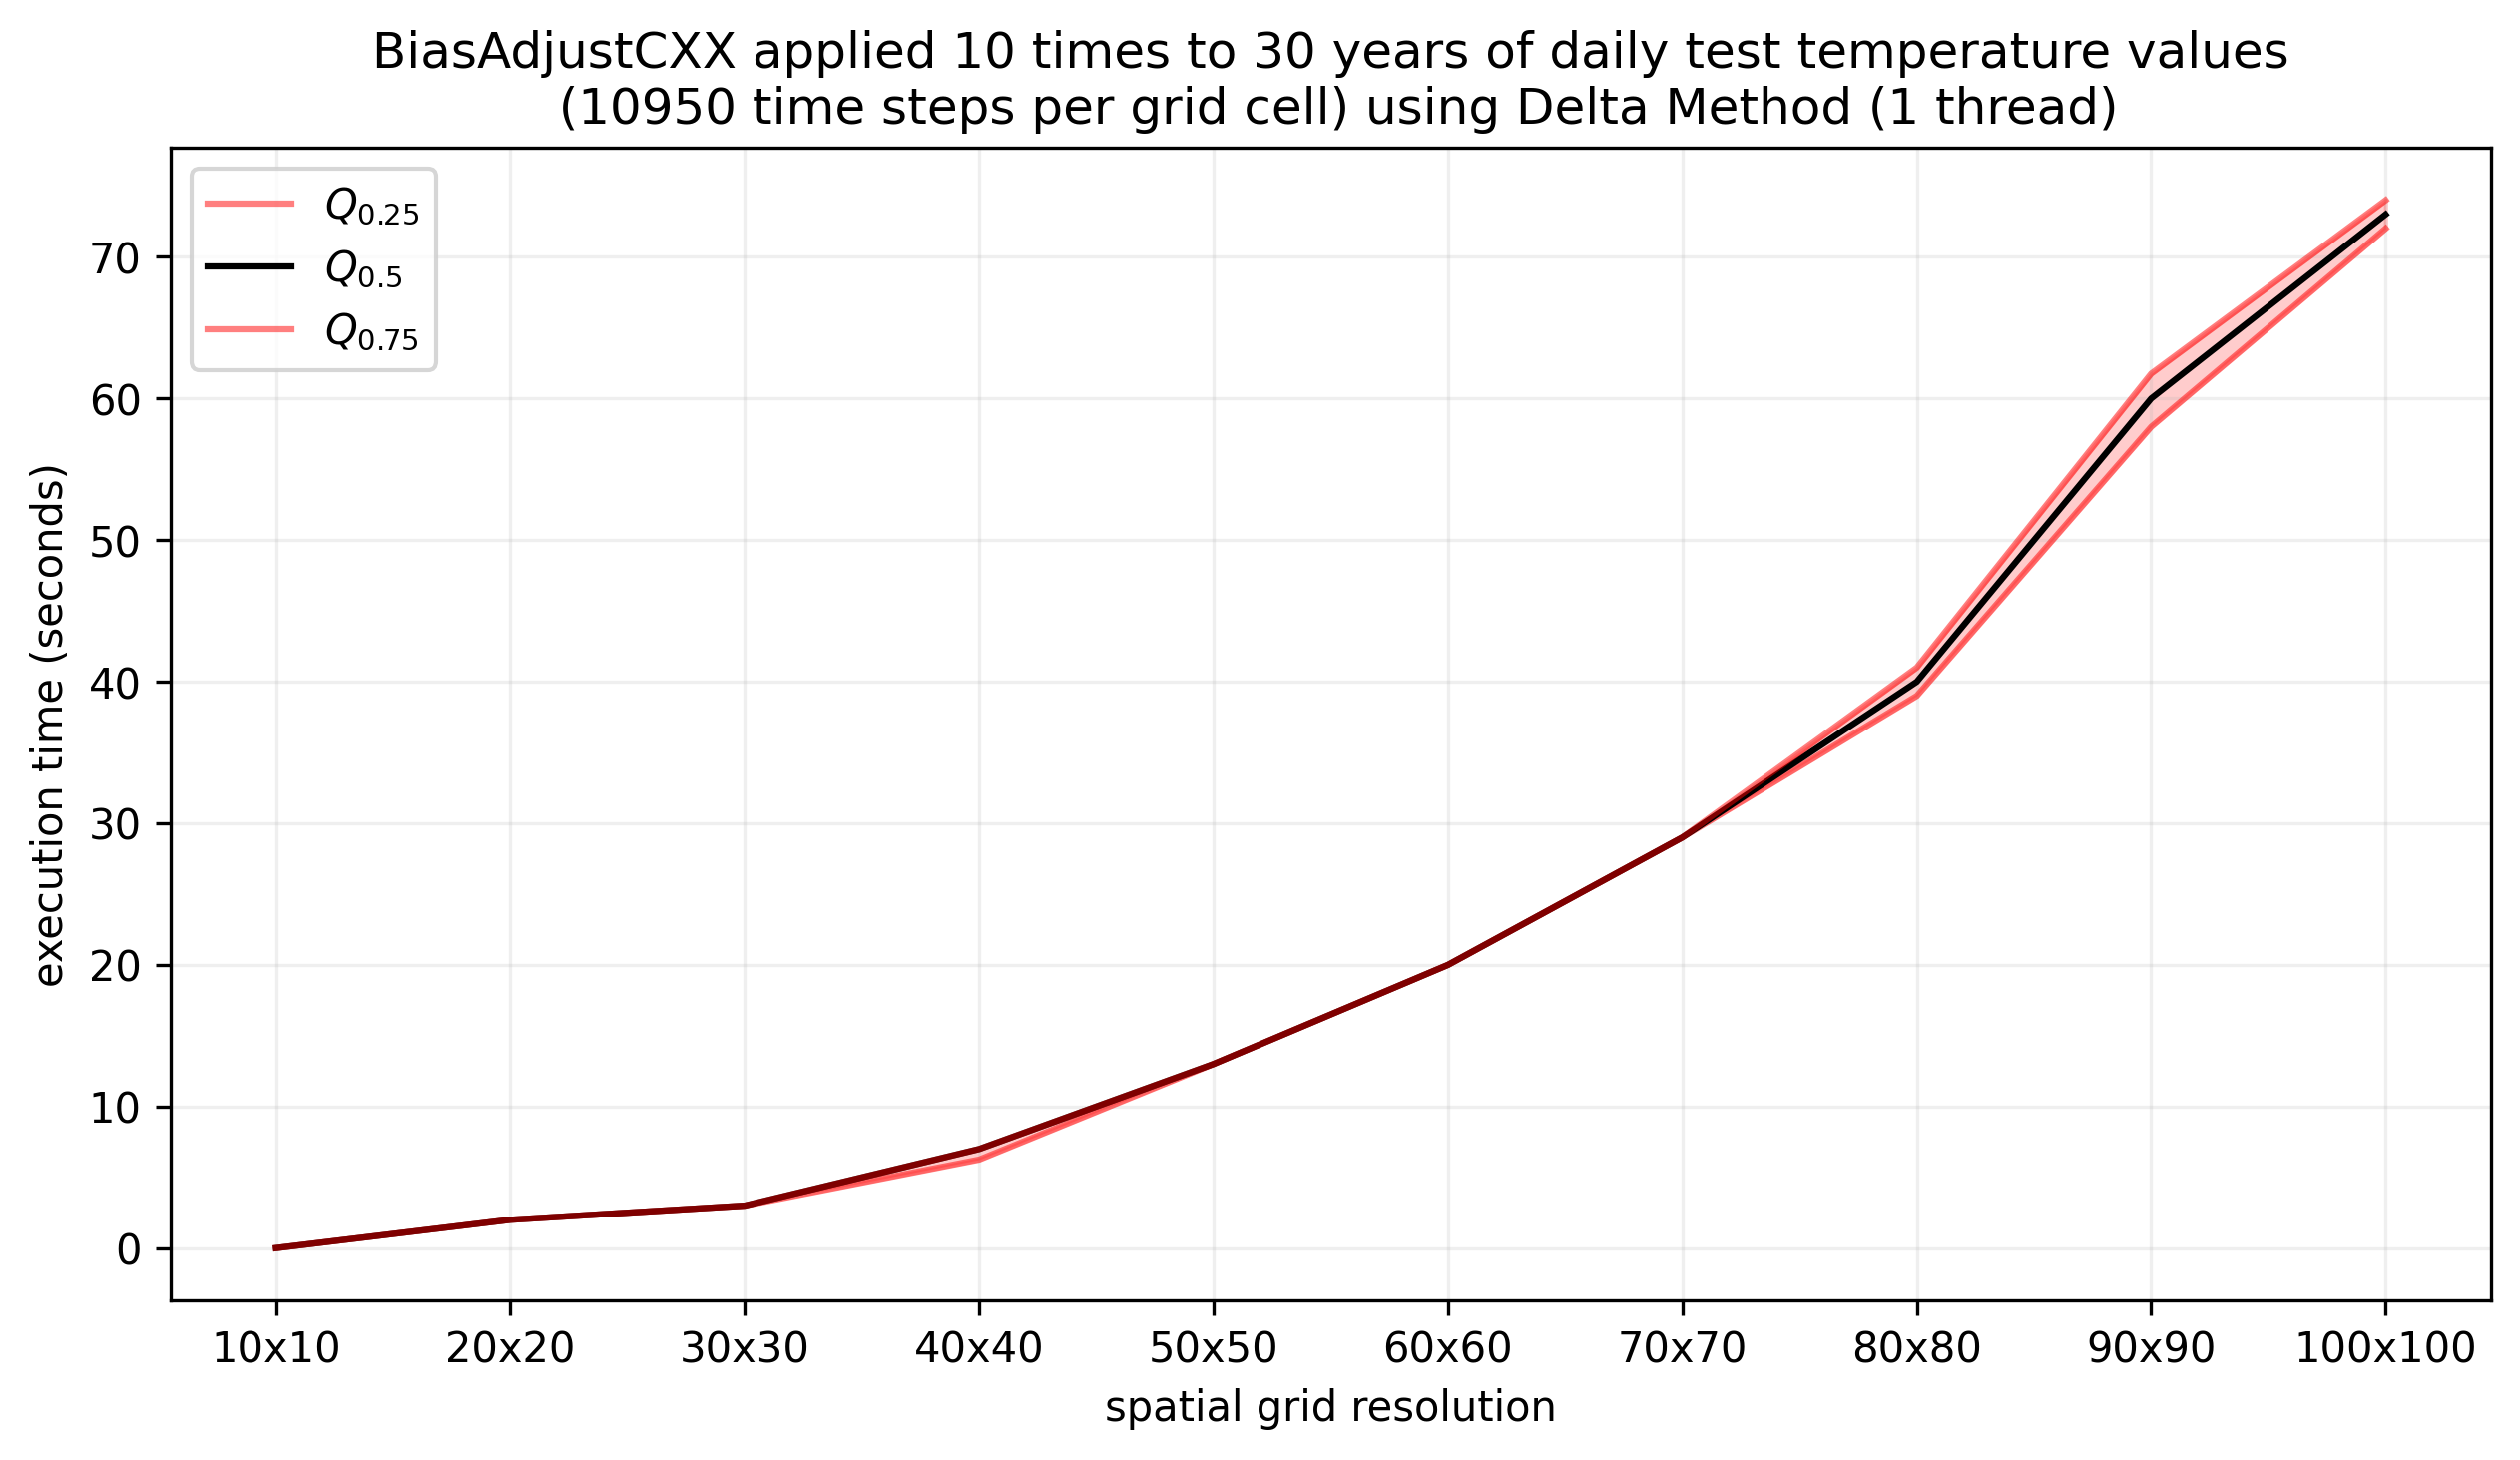

In [75]:
plot_1thread_quantile(data=cxx_dm, method='Delta Method')

It can be seen, that dere is barly any variance in the execution time for the delta method using 1 job.

In [79]:
if True: # local space 
    data_1job = cxx_dm.where(cxx_dm['jobs'] == 1)
    data = data_1job.groupby('resolution').quantile(.25)
    data['$Q_{0.25}$'] = data.tail(-1).append(data.iloc[0])['time (seconds)']
    data['$Q_{0.50}$'] = data_1job.groupby('resolution').quantile(.55).tail(-1).append(data.iloc[0])['time (seconds)']
    data['$Q_{0.75}$'] = data_1job.groupby('resolution').quantile(.75).tail(-1).append(data.iloc[0])['time (seconds)']
    data = data.drop(columns=['time (seconds)'])
    print(data)

            jobs  $Q_{0.25}$  $Q_{0.50}$  $Q_{0.75}$
resolution                                          
100x100      1.0       72.00        72.0       72.00
10x10        1.0        0.00         0.0        0.00
20x20        1.0        2.00         2.0        2.00
30x30        1.0        3.00         3.0        3.00
40x40        1.0        6.25         7.0        7.00
50x50        1.0       13.00        13.0       13.00
60x60        1.0       20.00        20.0       20.00
70x70        1.0       29.00        29.0       29.00
80x80        1.0       39.00        40.0       41.00
90x90        1.0       58.00        60.9       61.75


#### BiasAdjustCXX: Linear Scaling

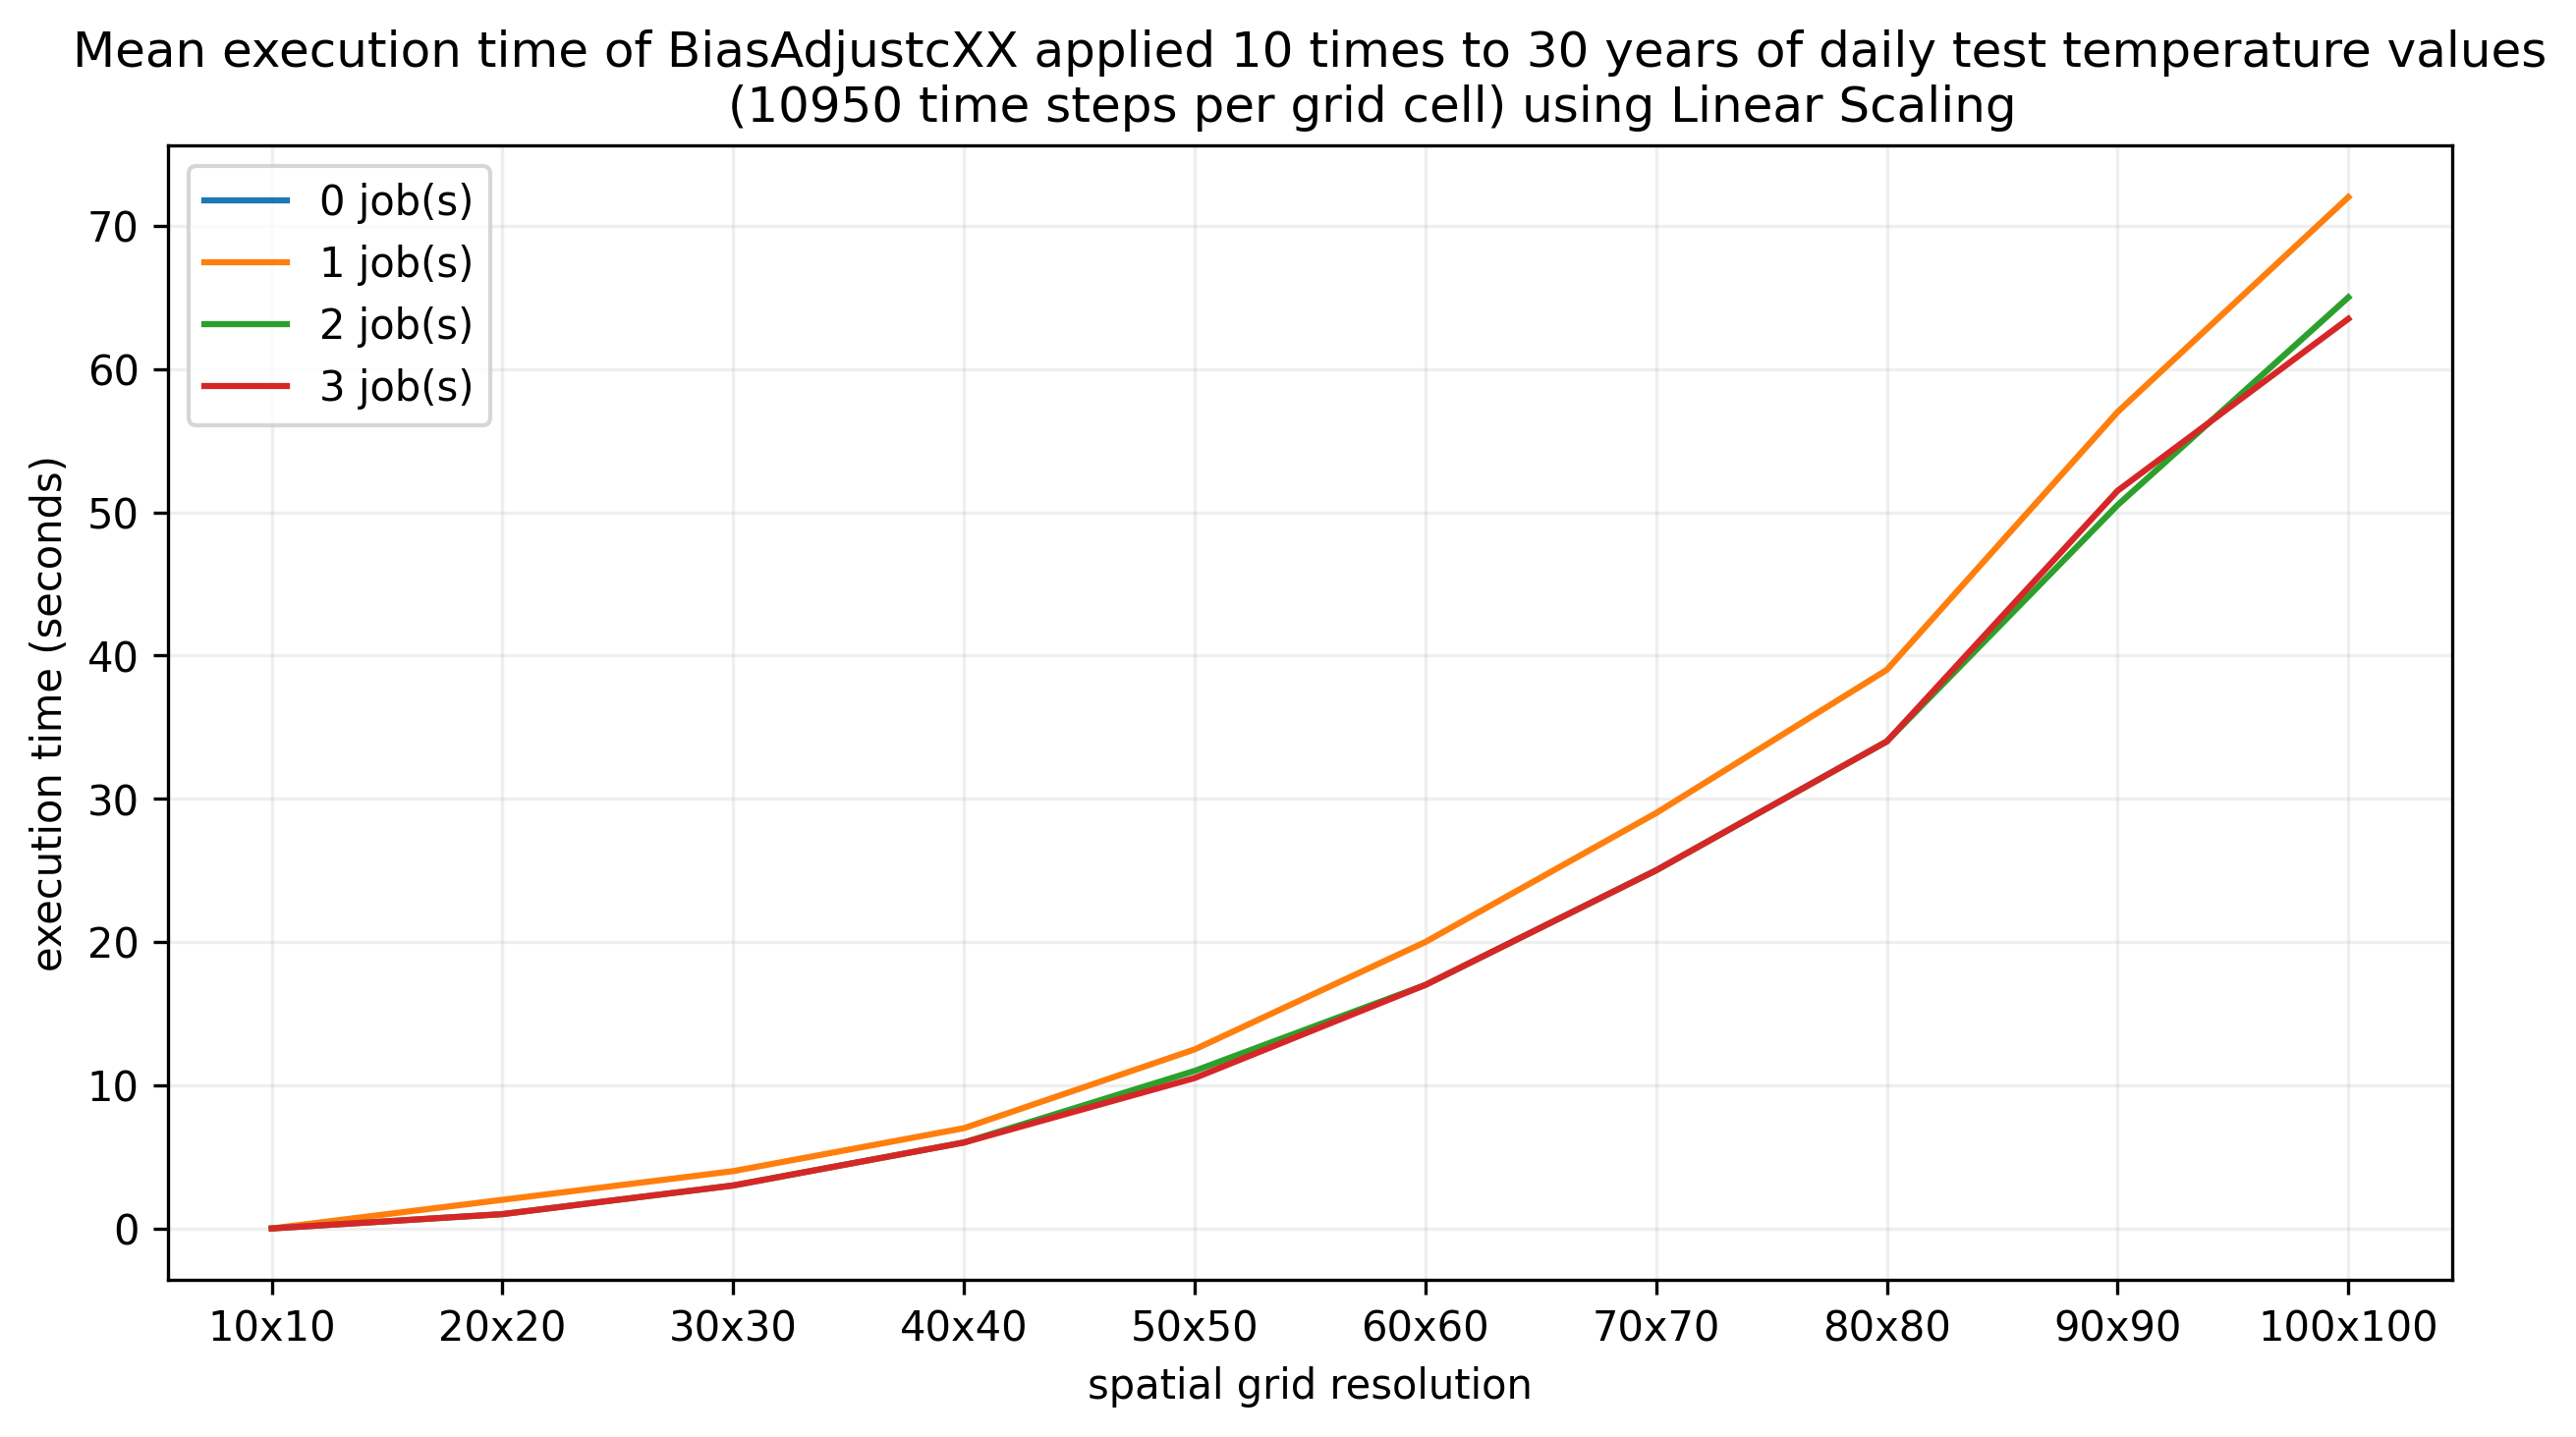

In [80]:
plot_multiple_threds(data=cxx_ls, method='Linear Scaling')

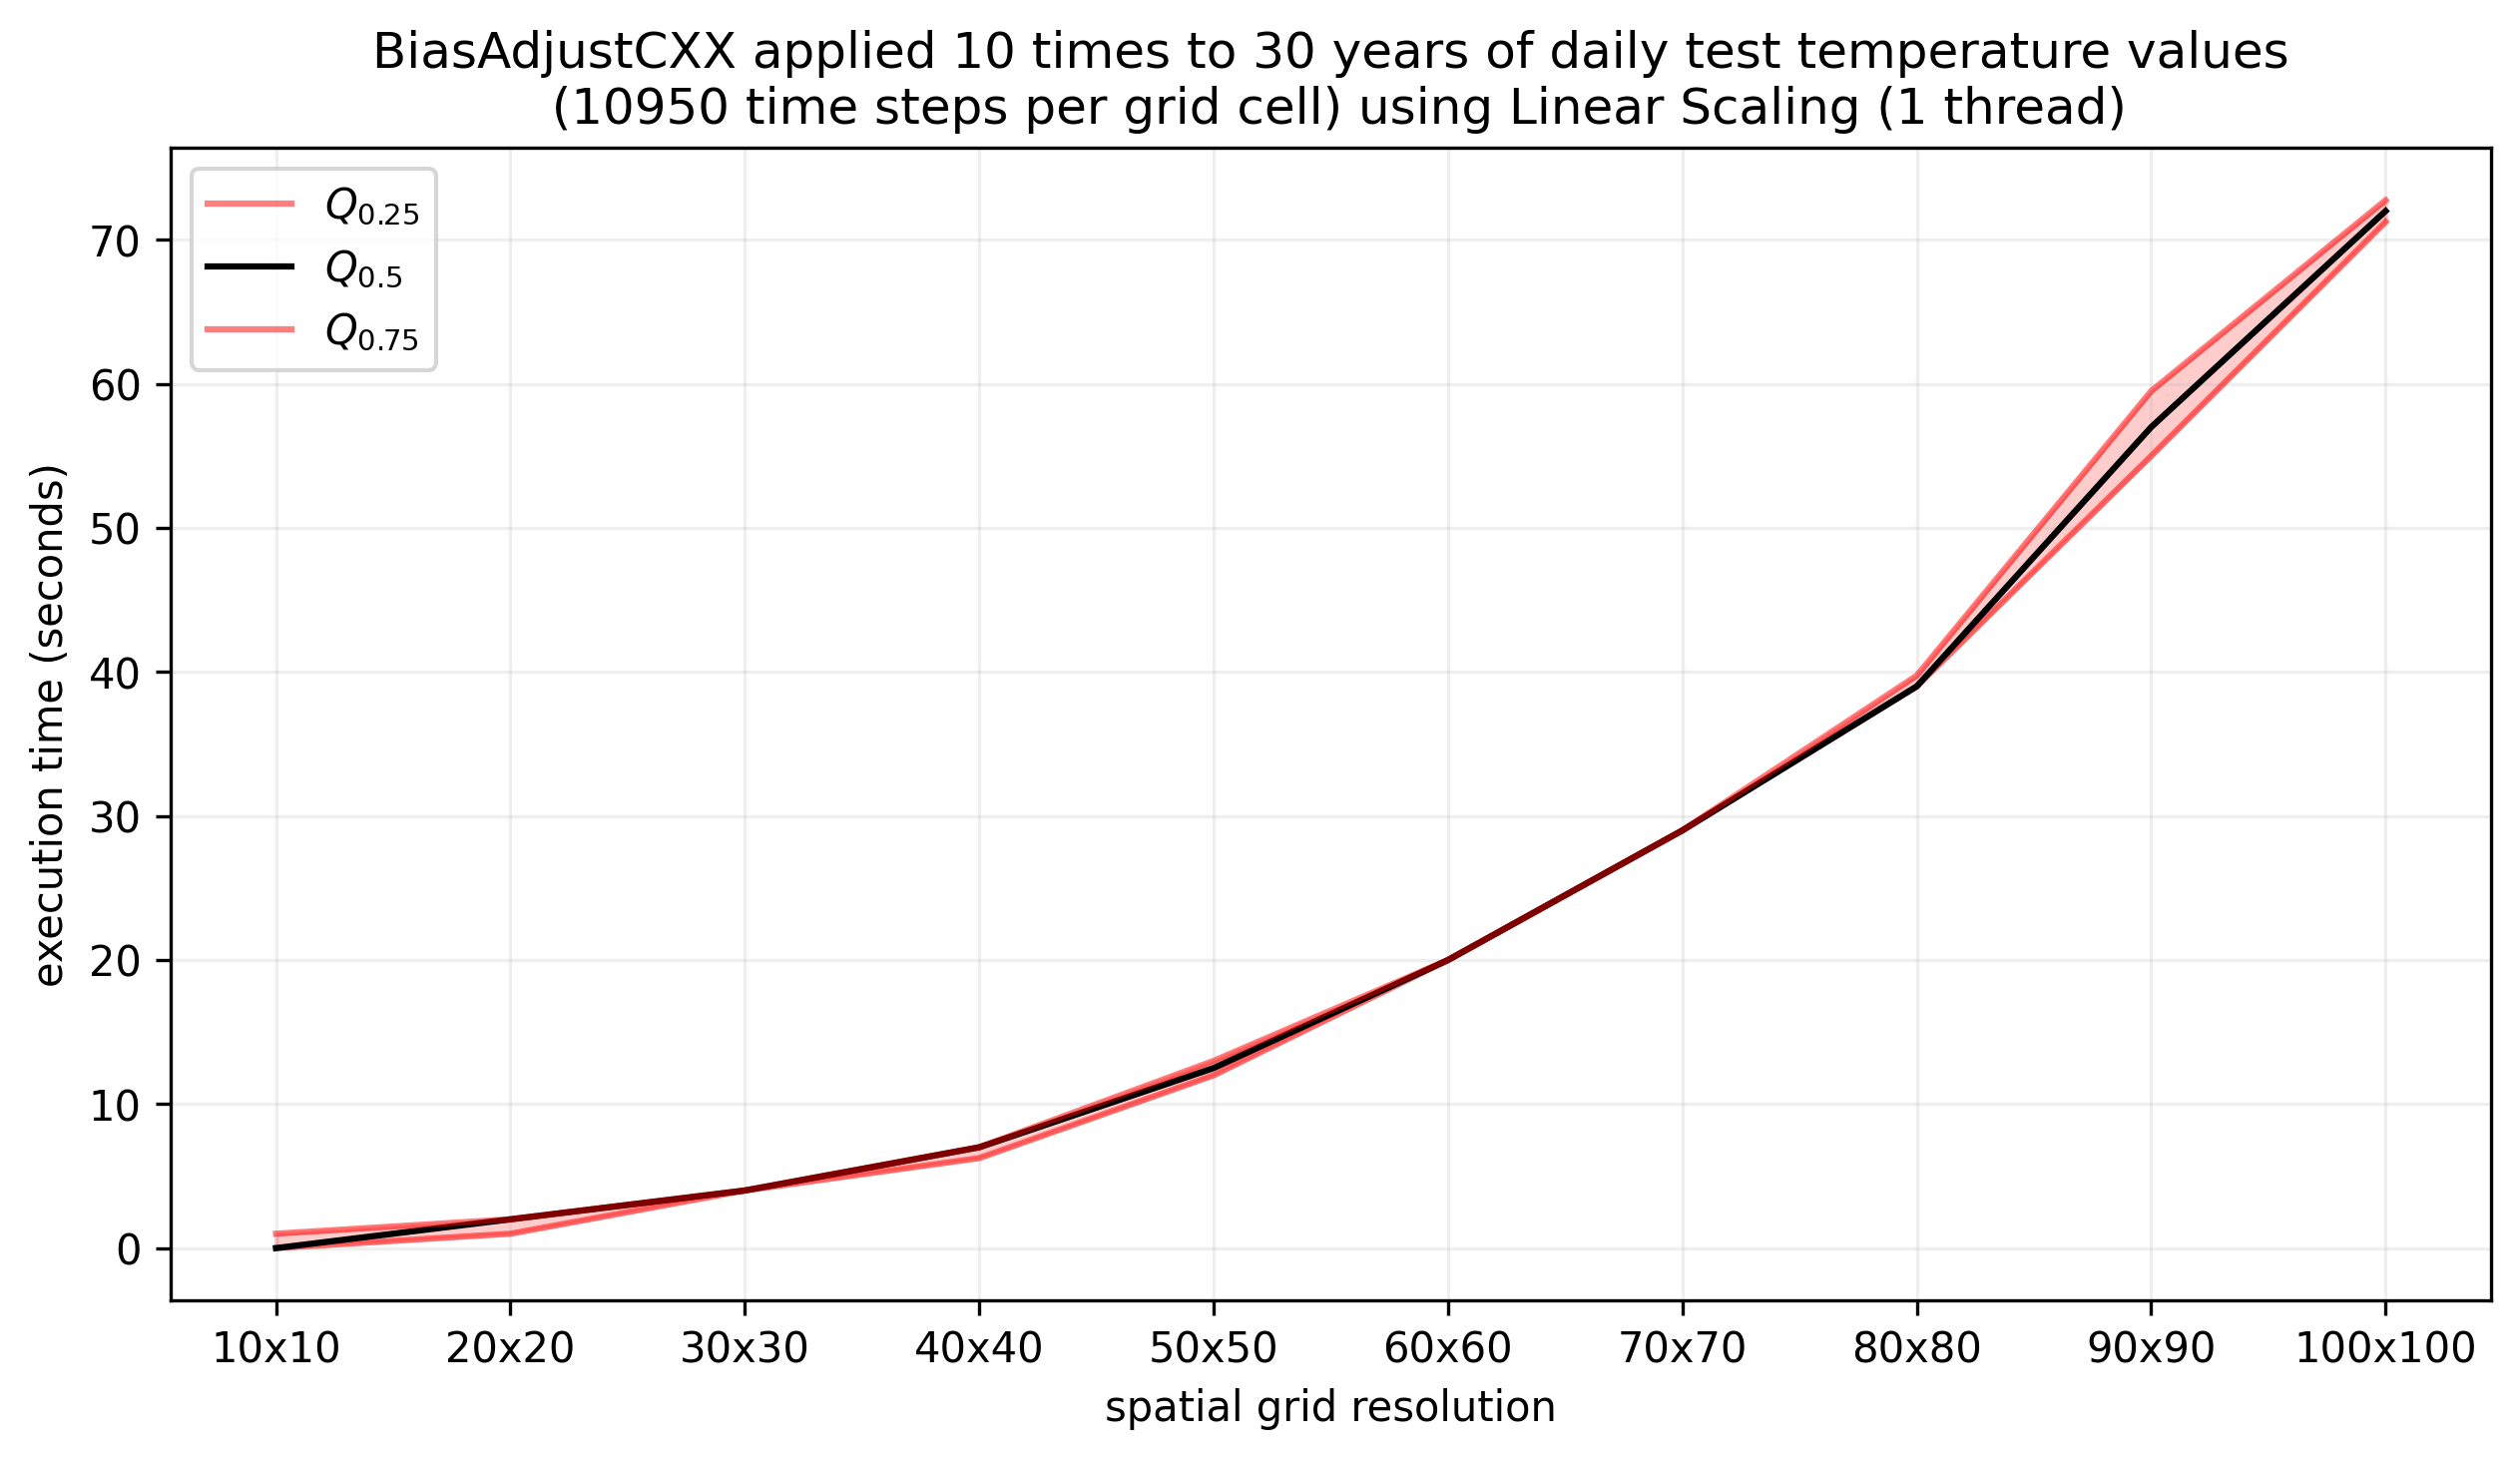

In [81]:
plot_1thread_quantile(data=cxx_ls, method='Linear Scaling')

#### BiasAdjustCXX: Variance Scaling

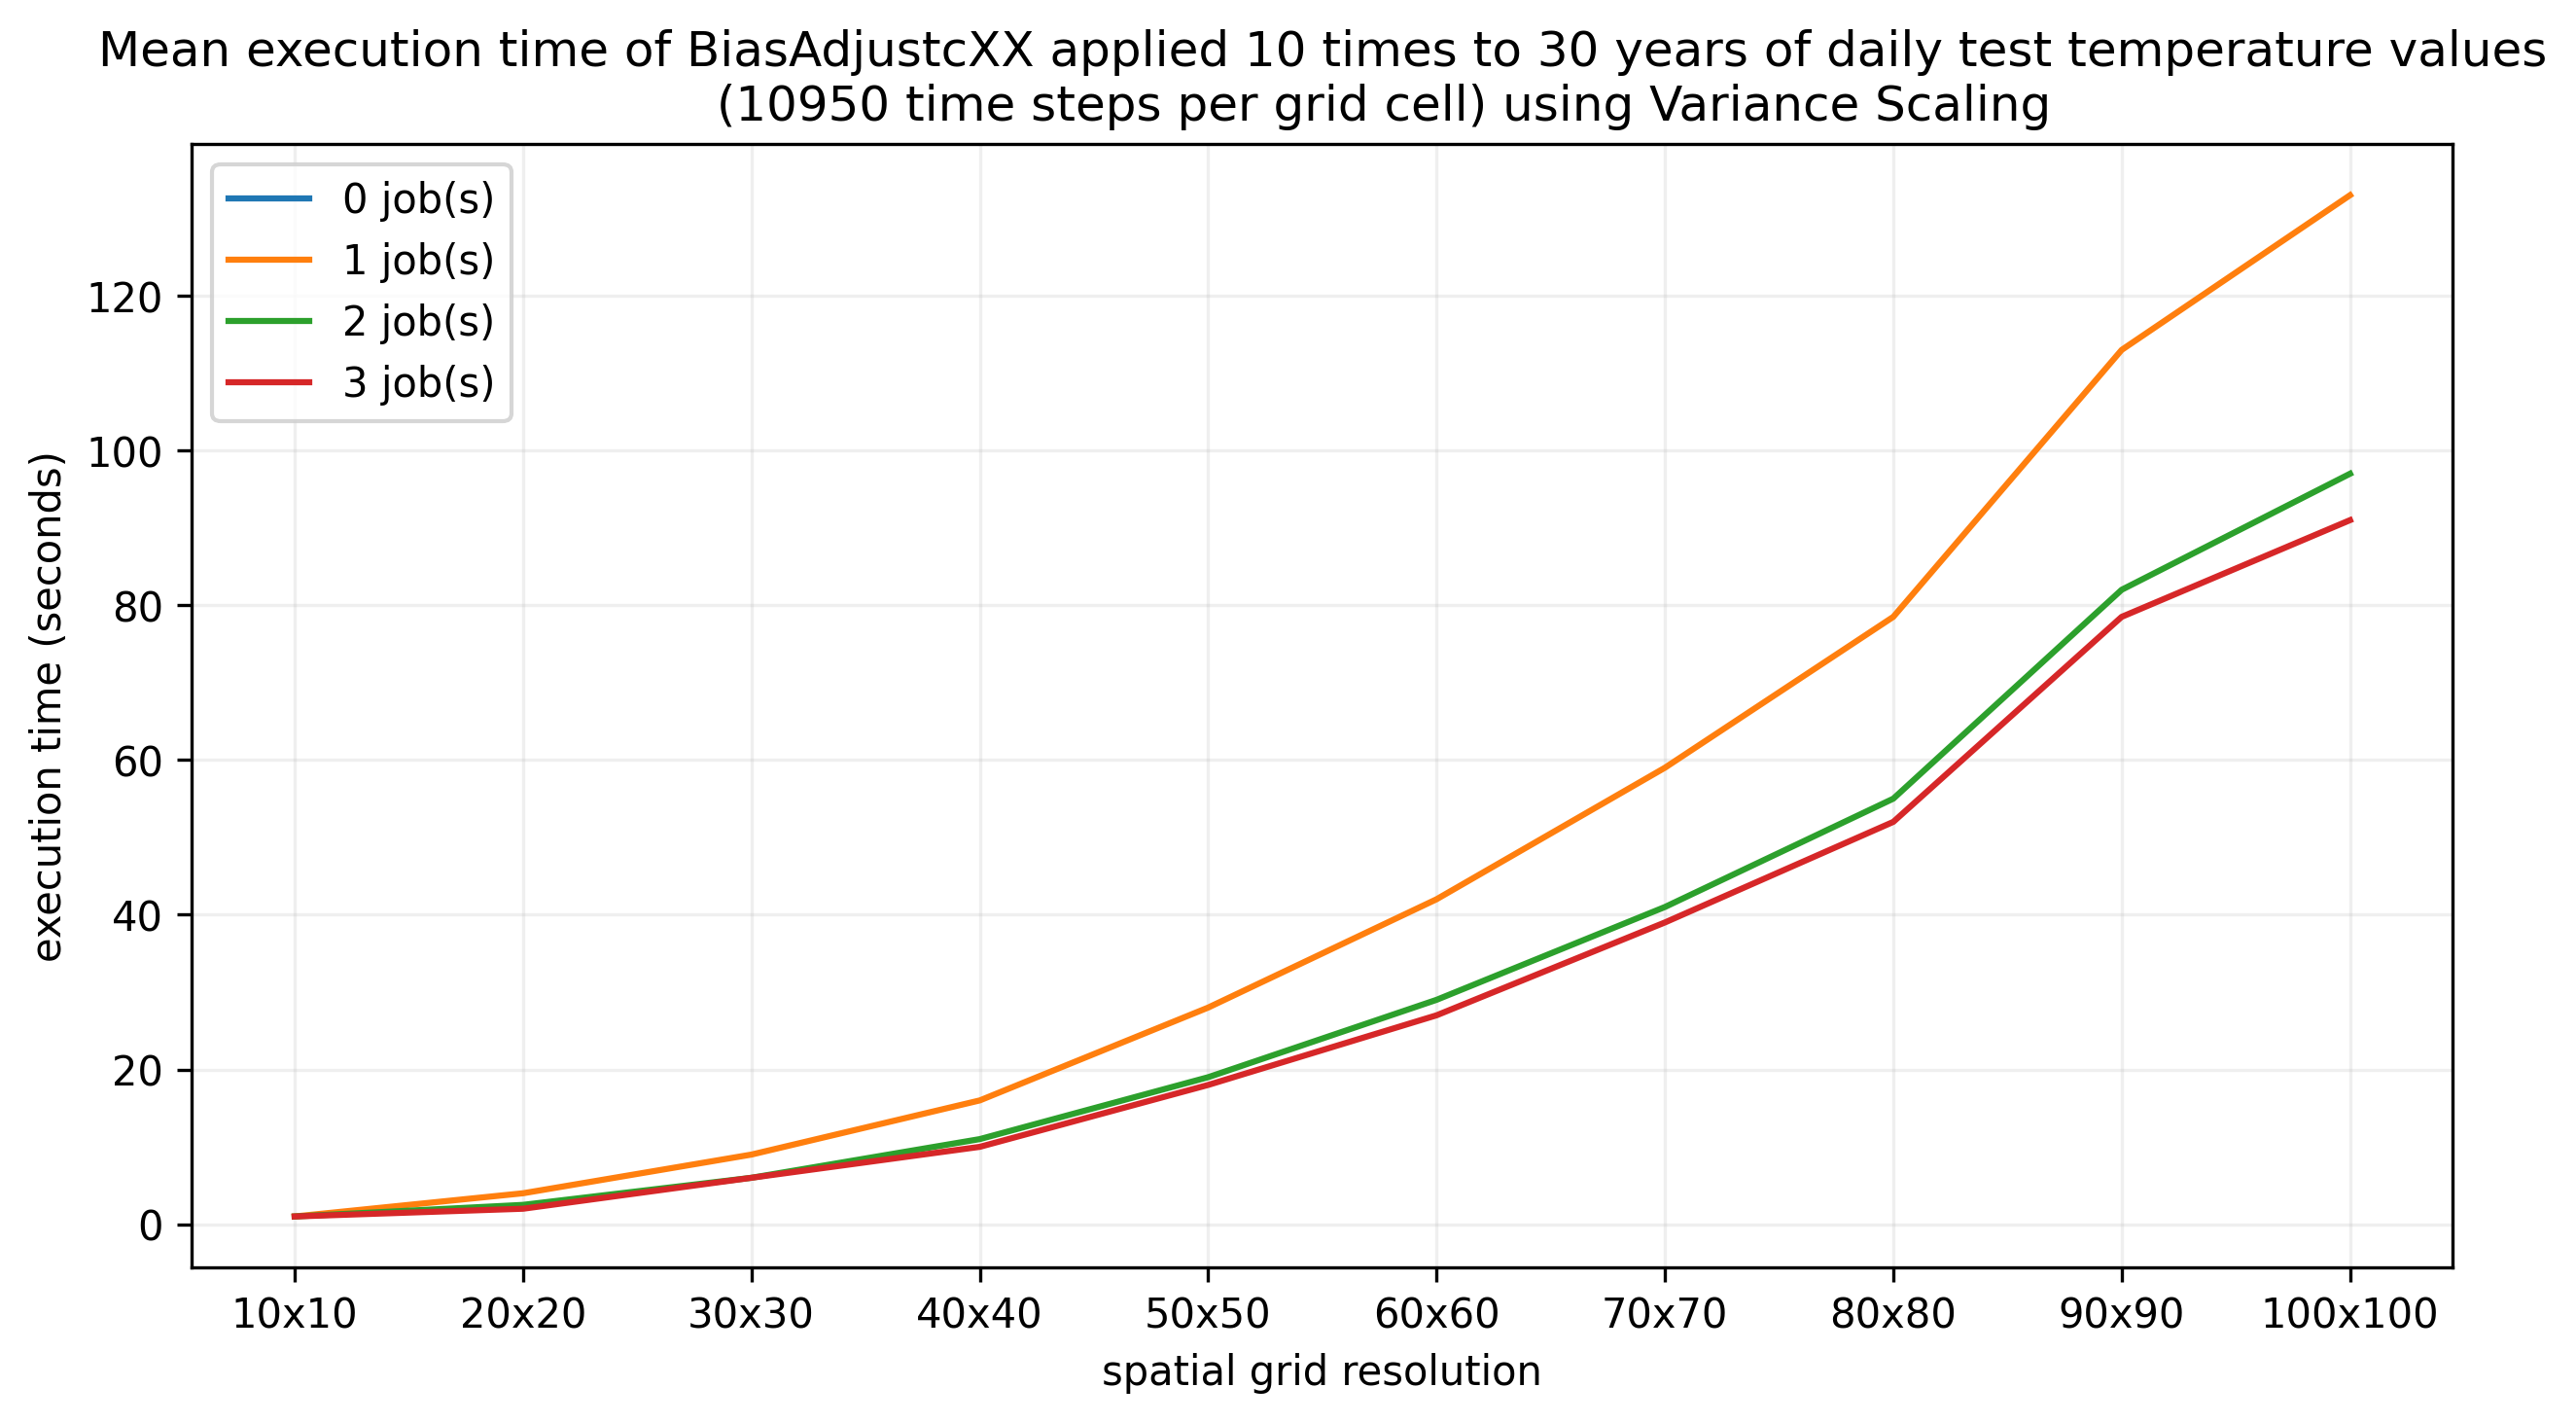

In [82]:
plot_multiple_threds(data=cxx_vs, method='Variance Scaling')

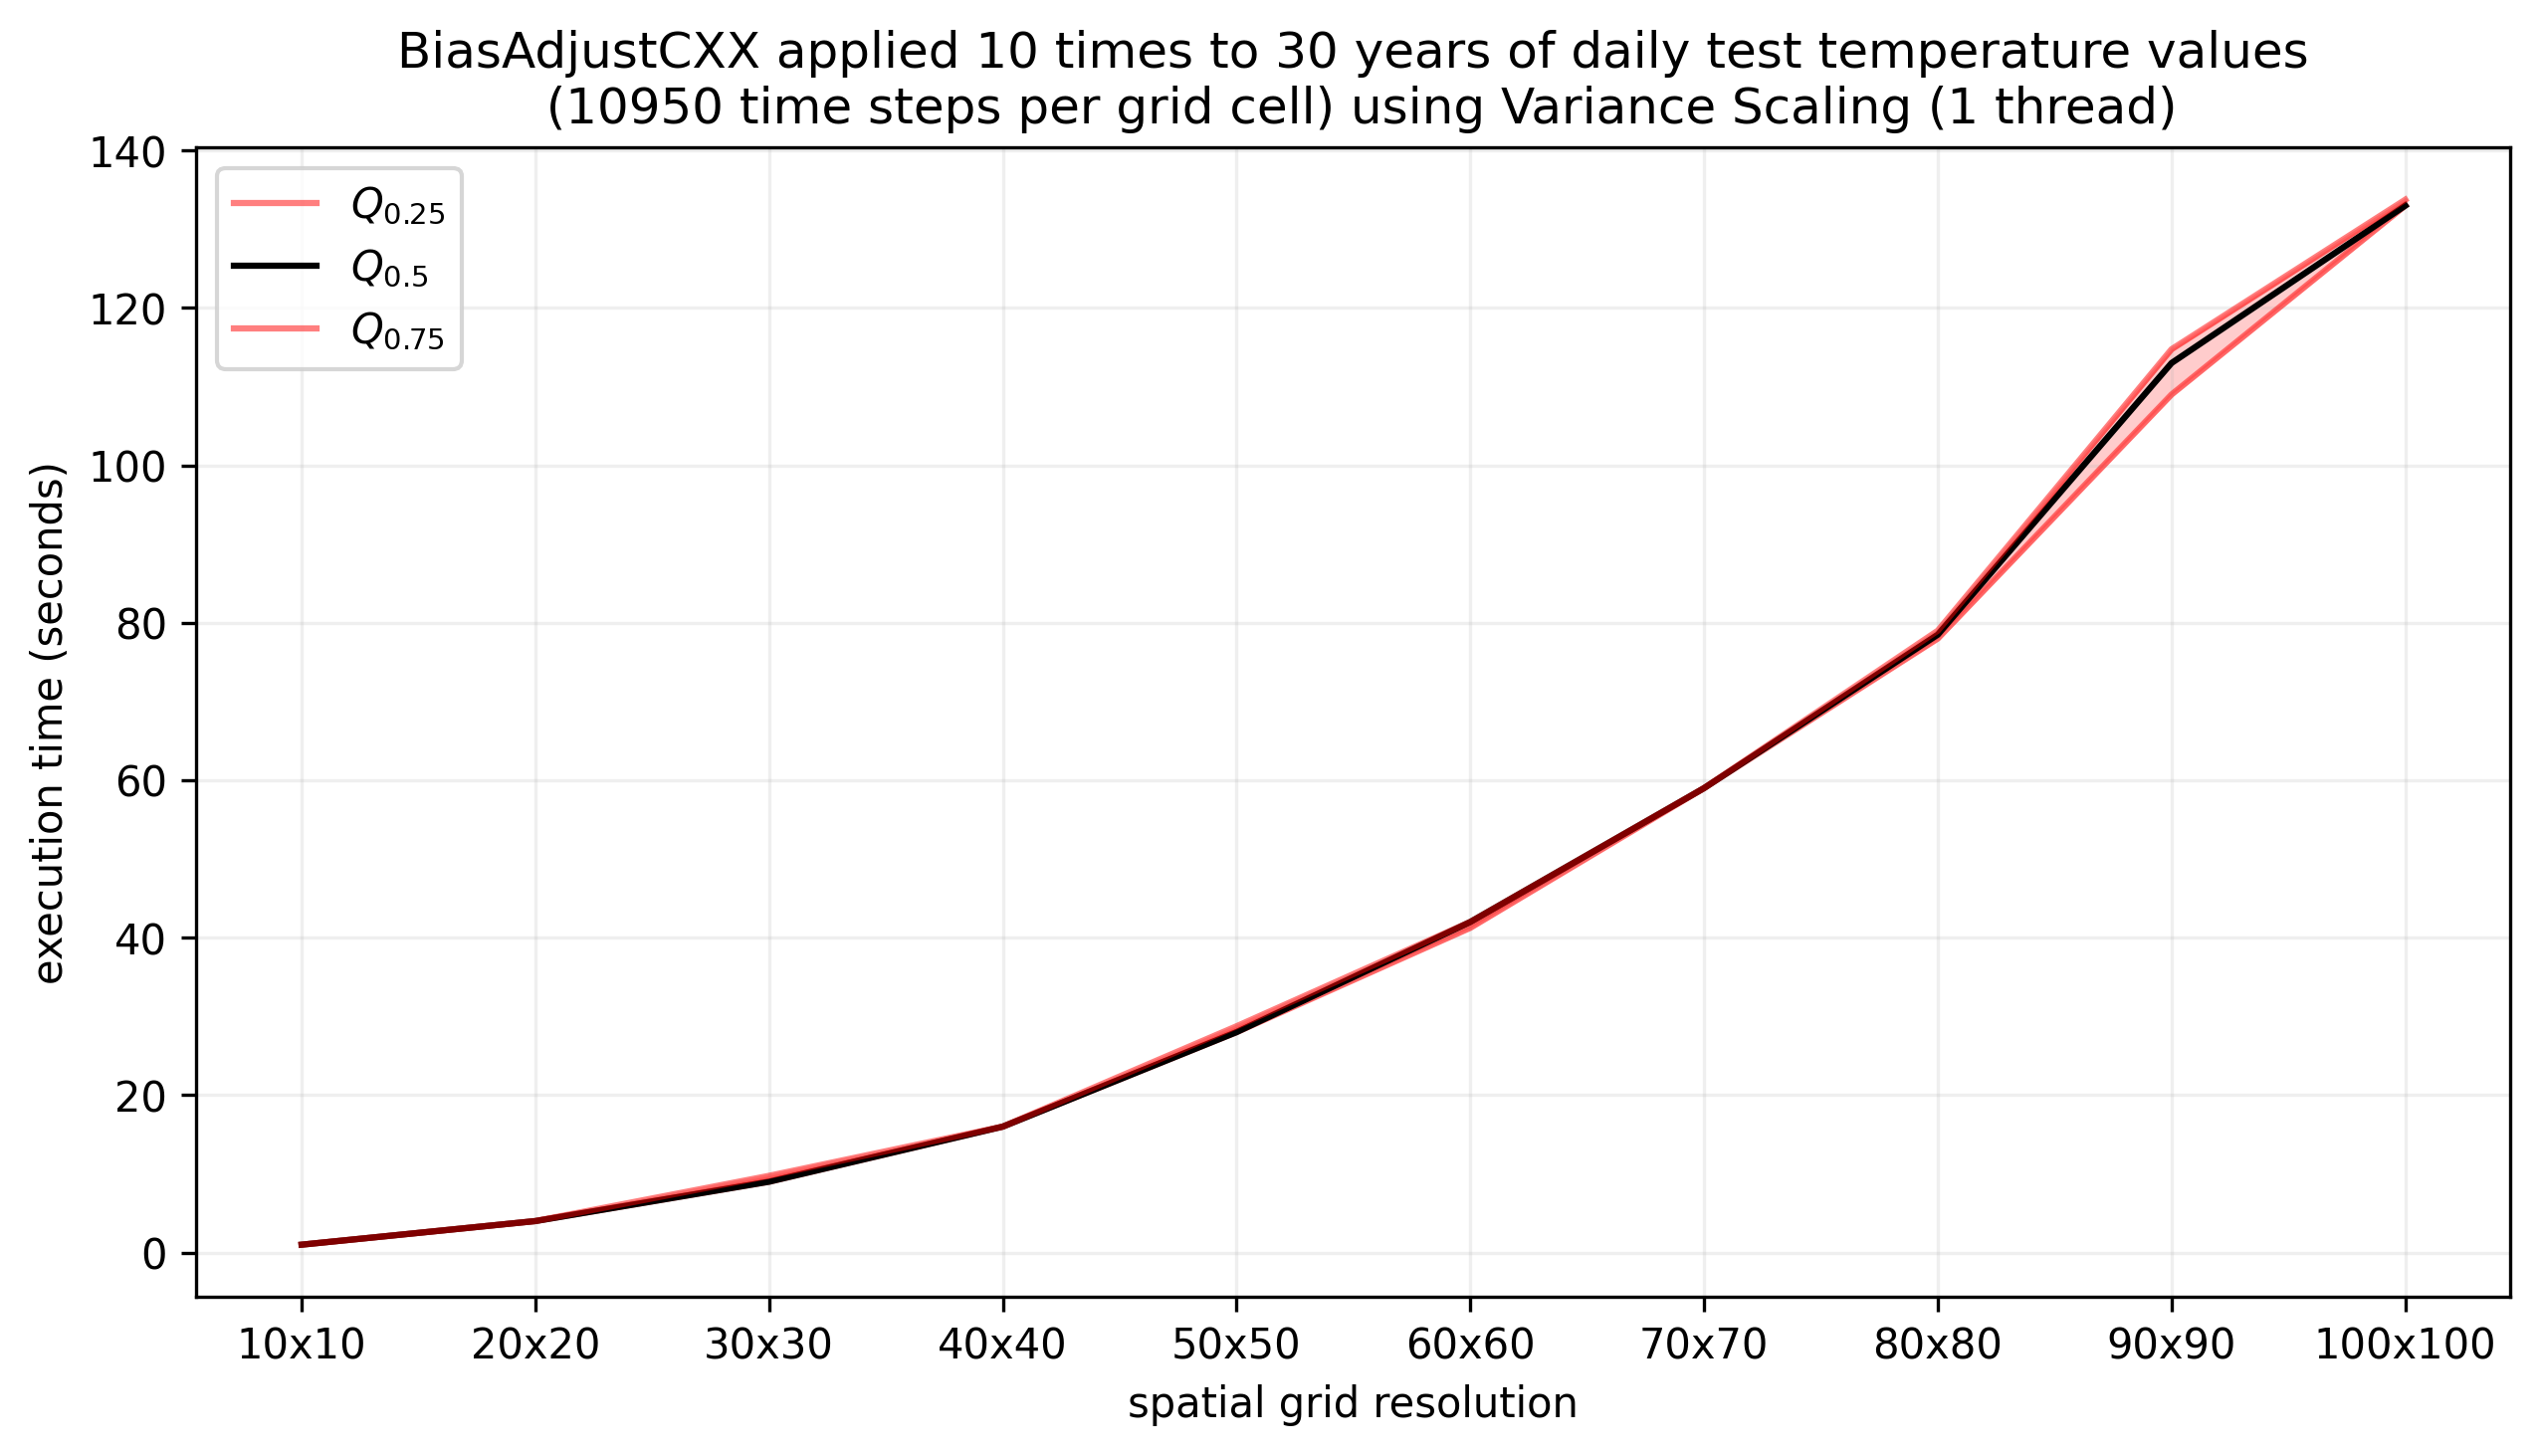

In [83]:
plot_1thread_quantile(data=cxx_vs, method='Variance Scaling')

#### BiasAdjustCXX: Quantile Mapping

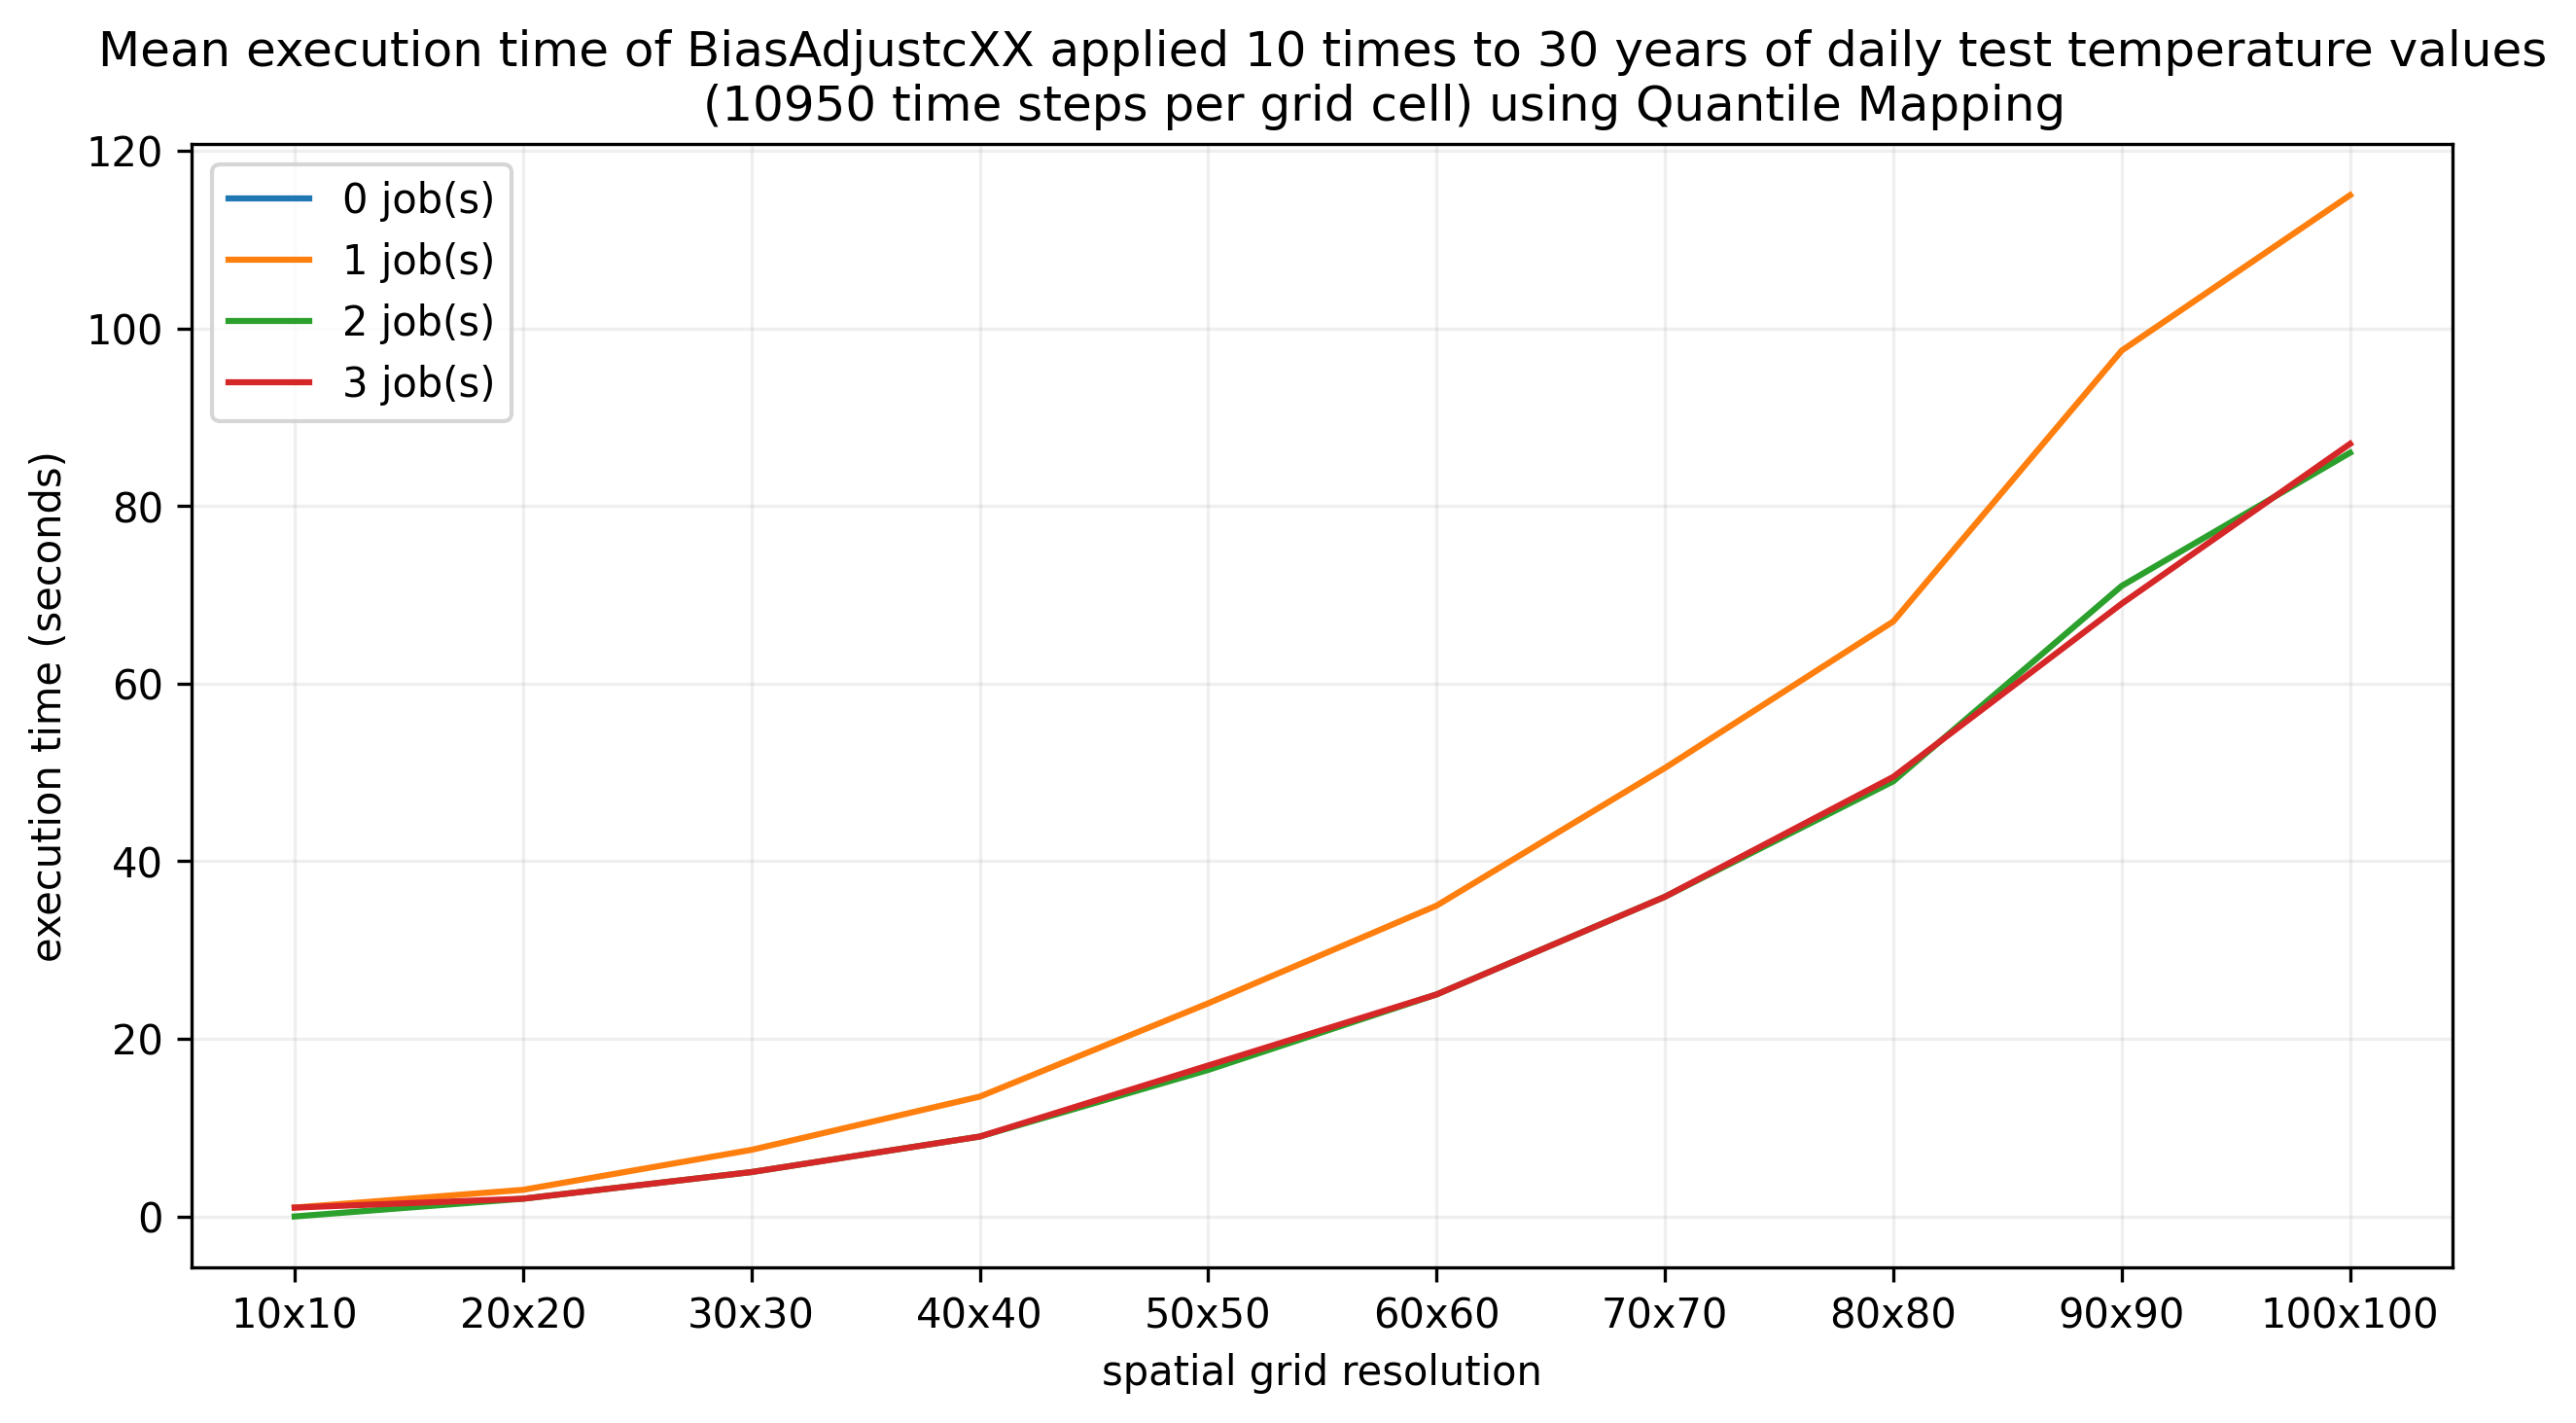

In [84]:
plot_multiple_threds(data=cxx_qm, method='Quantile Mapping')

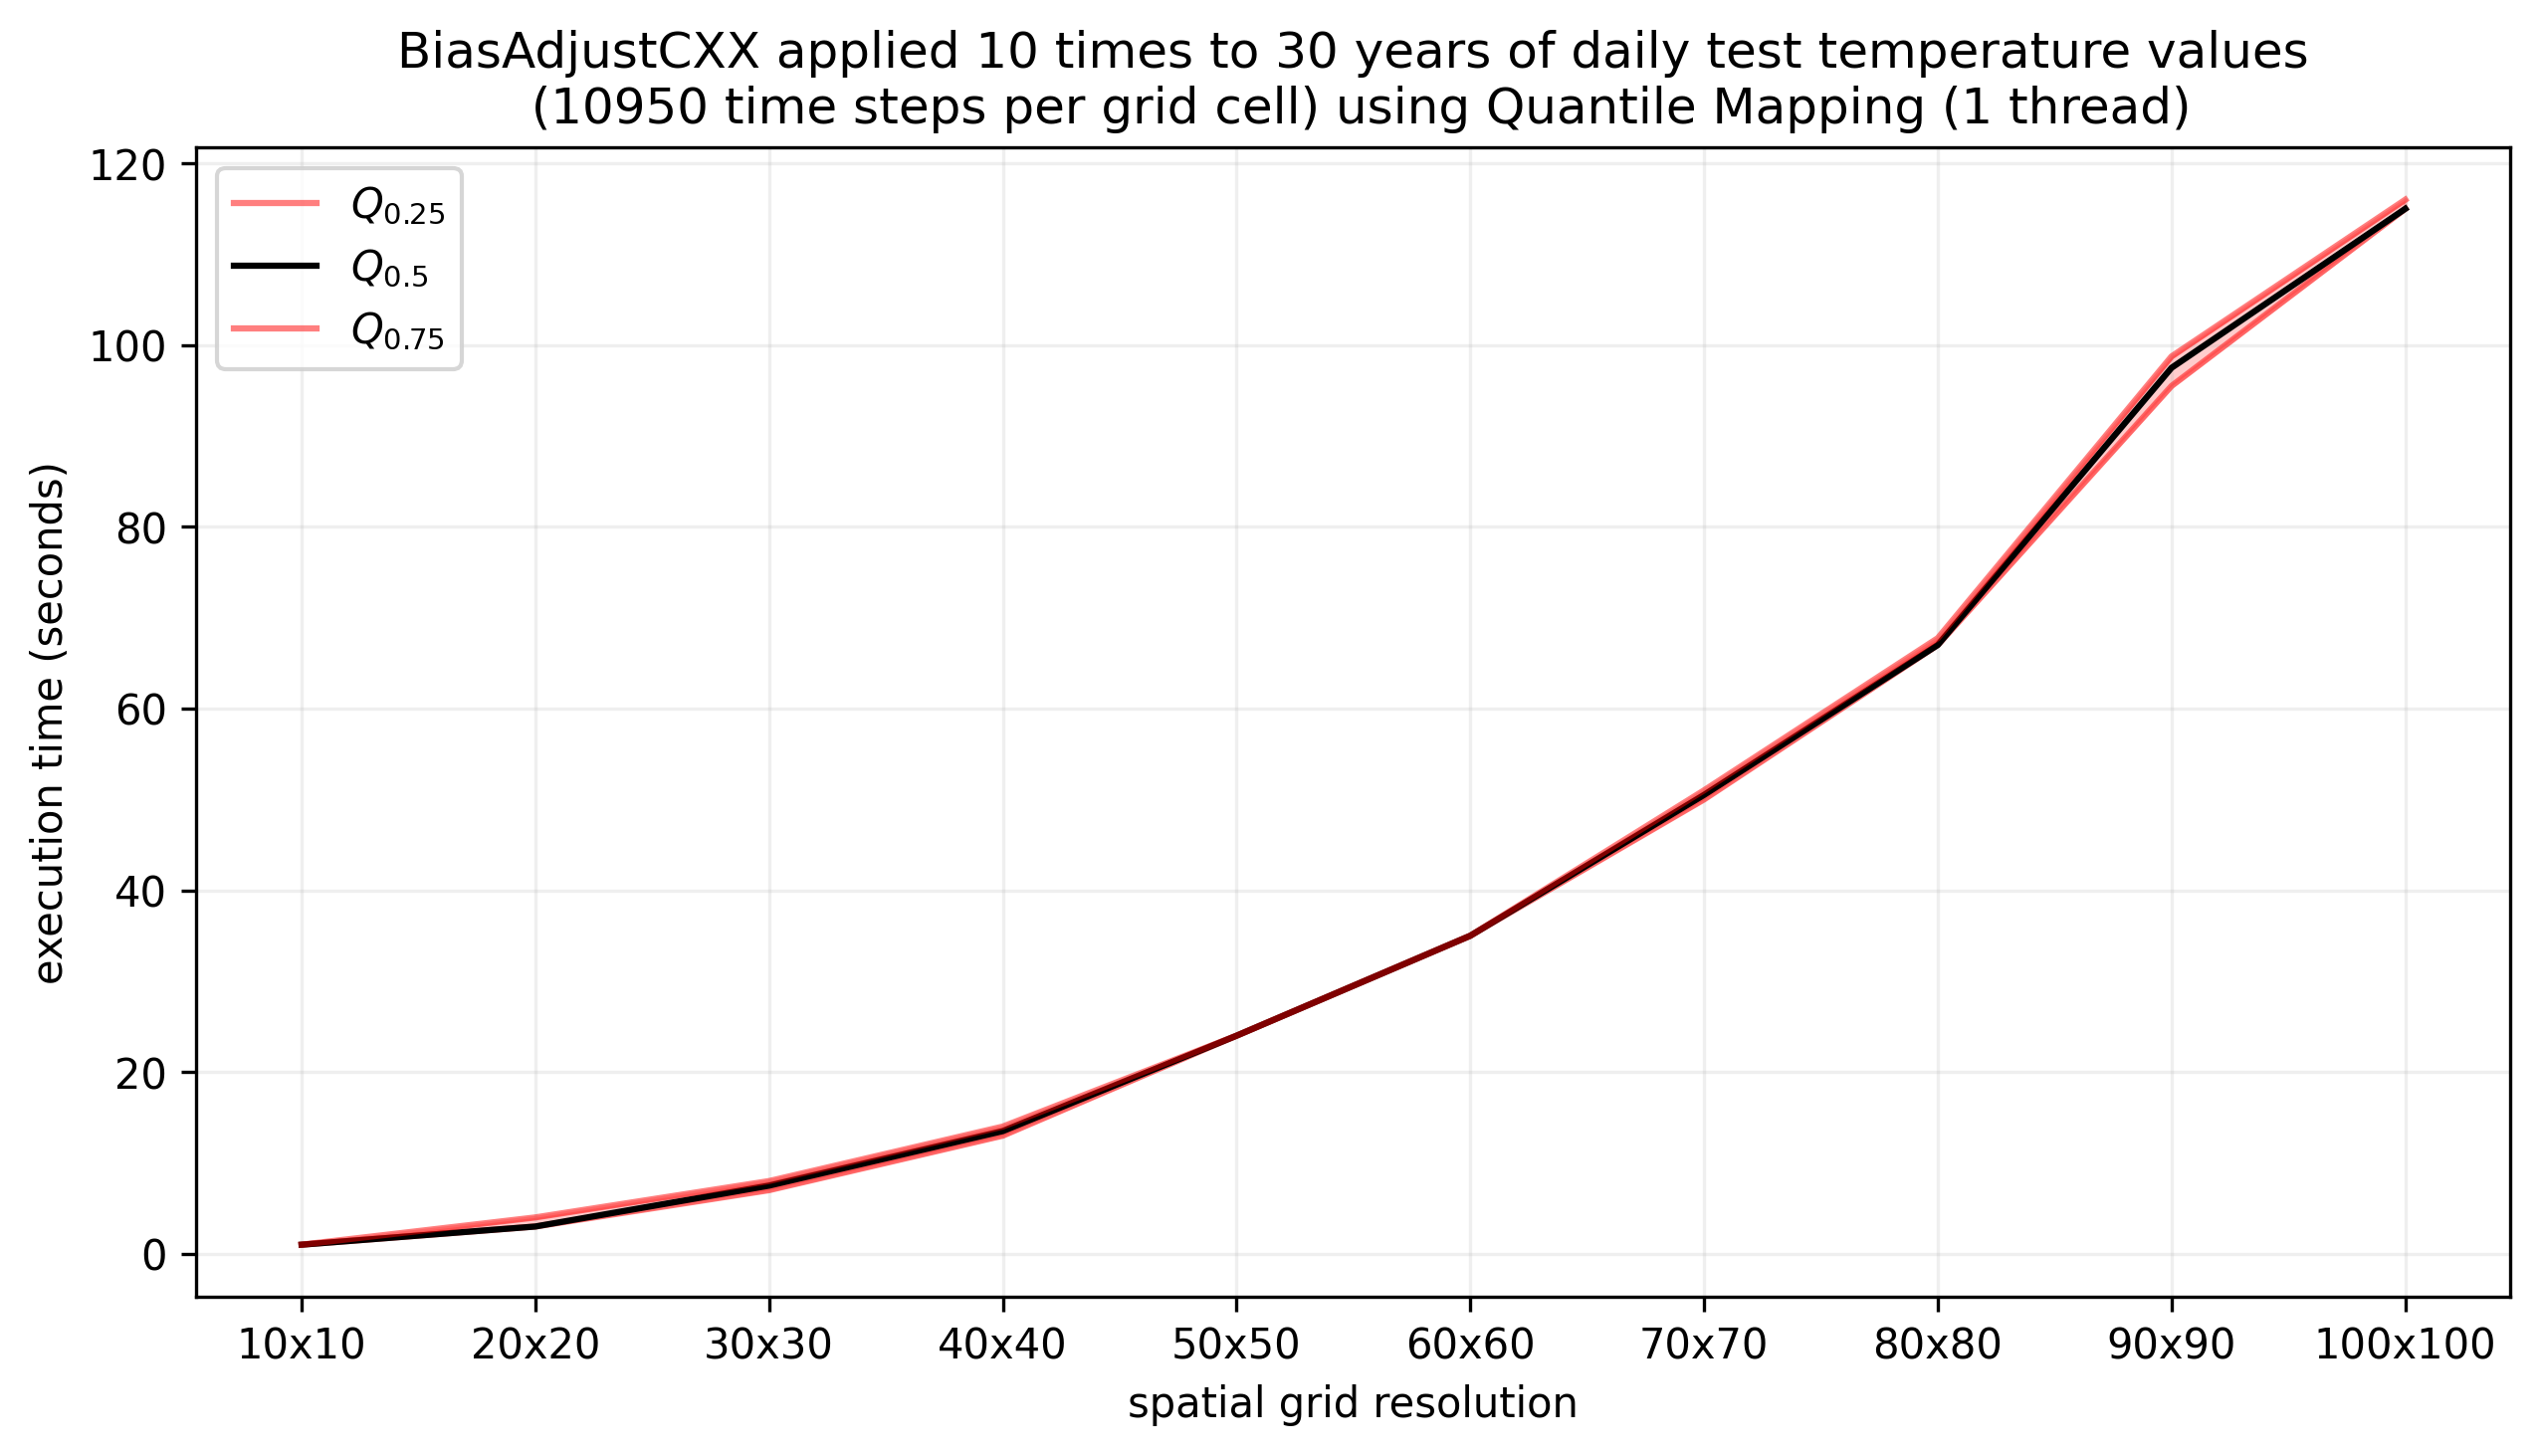

In [85]:
plot_1thread_quantile(data=cxx_qm, method='Quantile Mapping')

#### BiasAdjustCXX: Quantile Delta Mapping

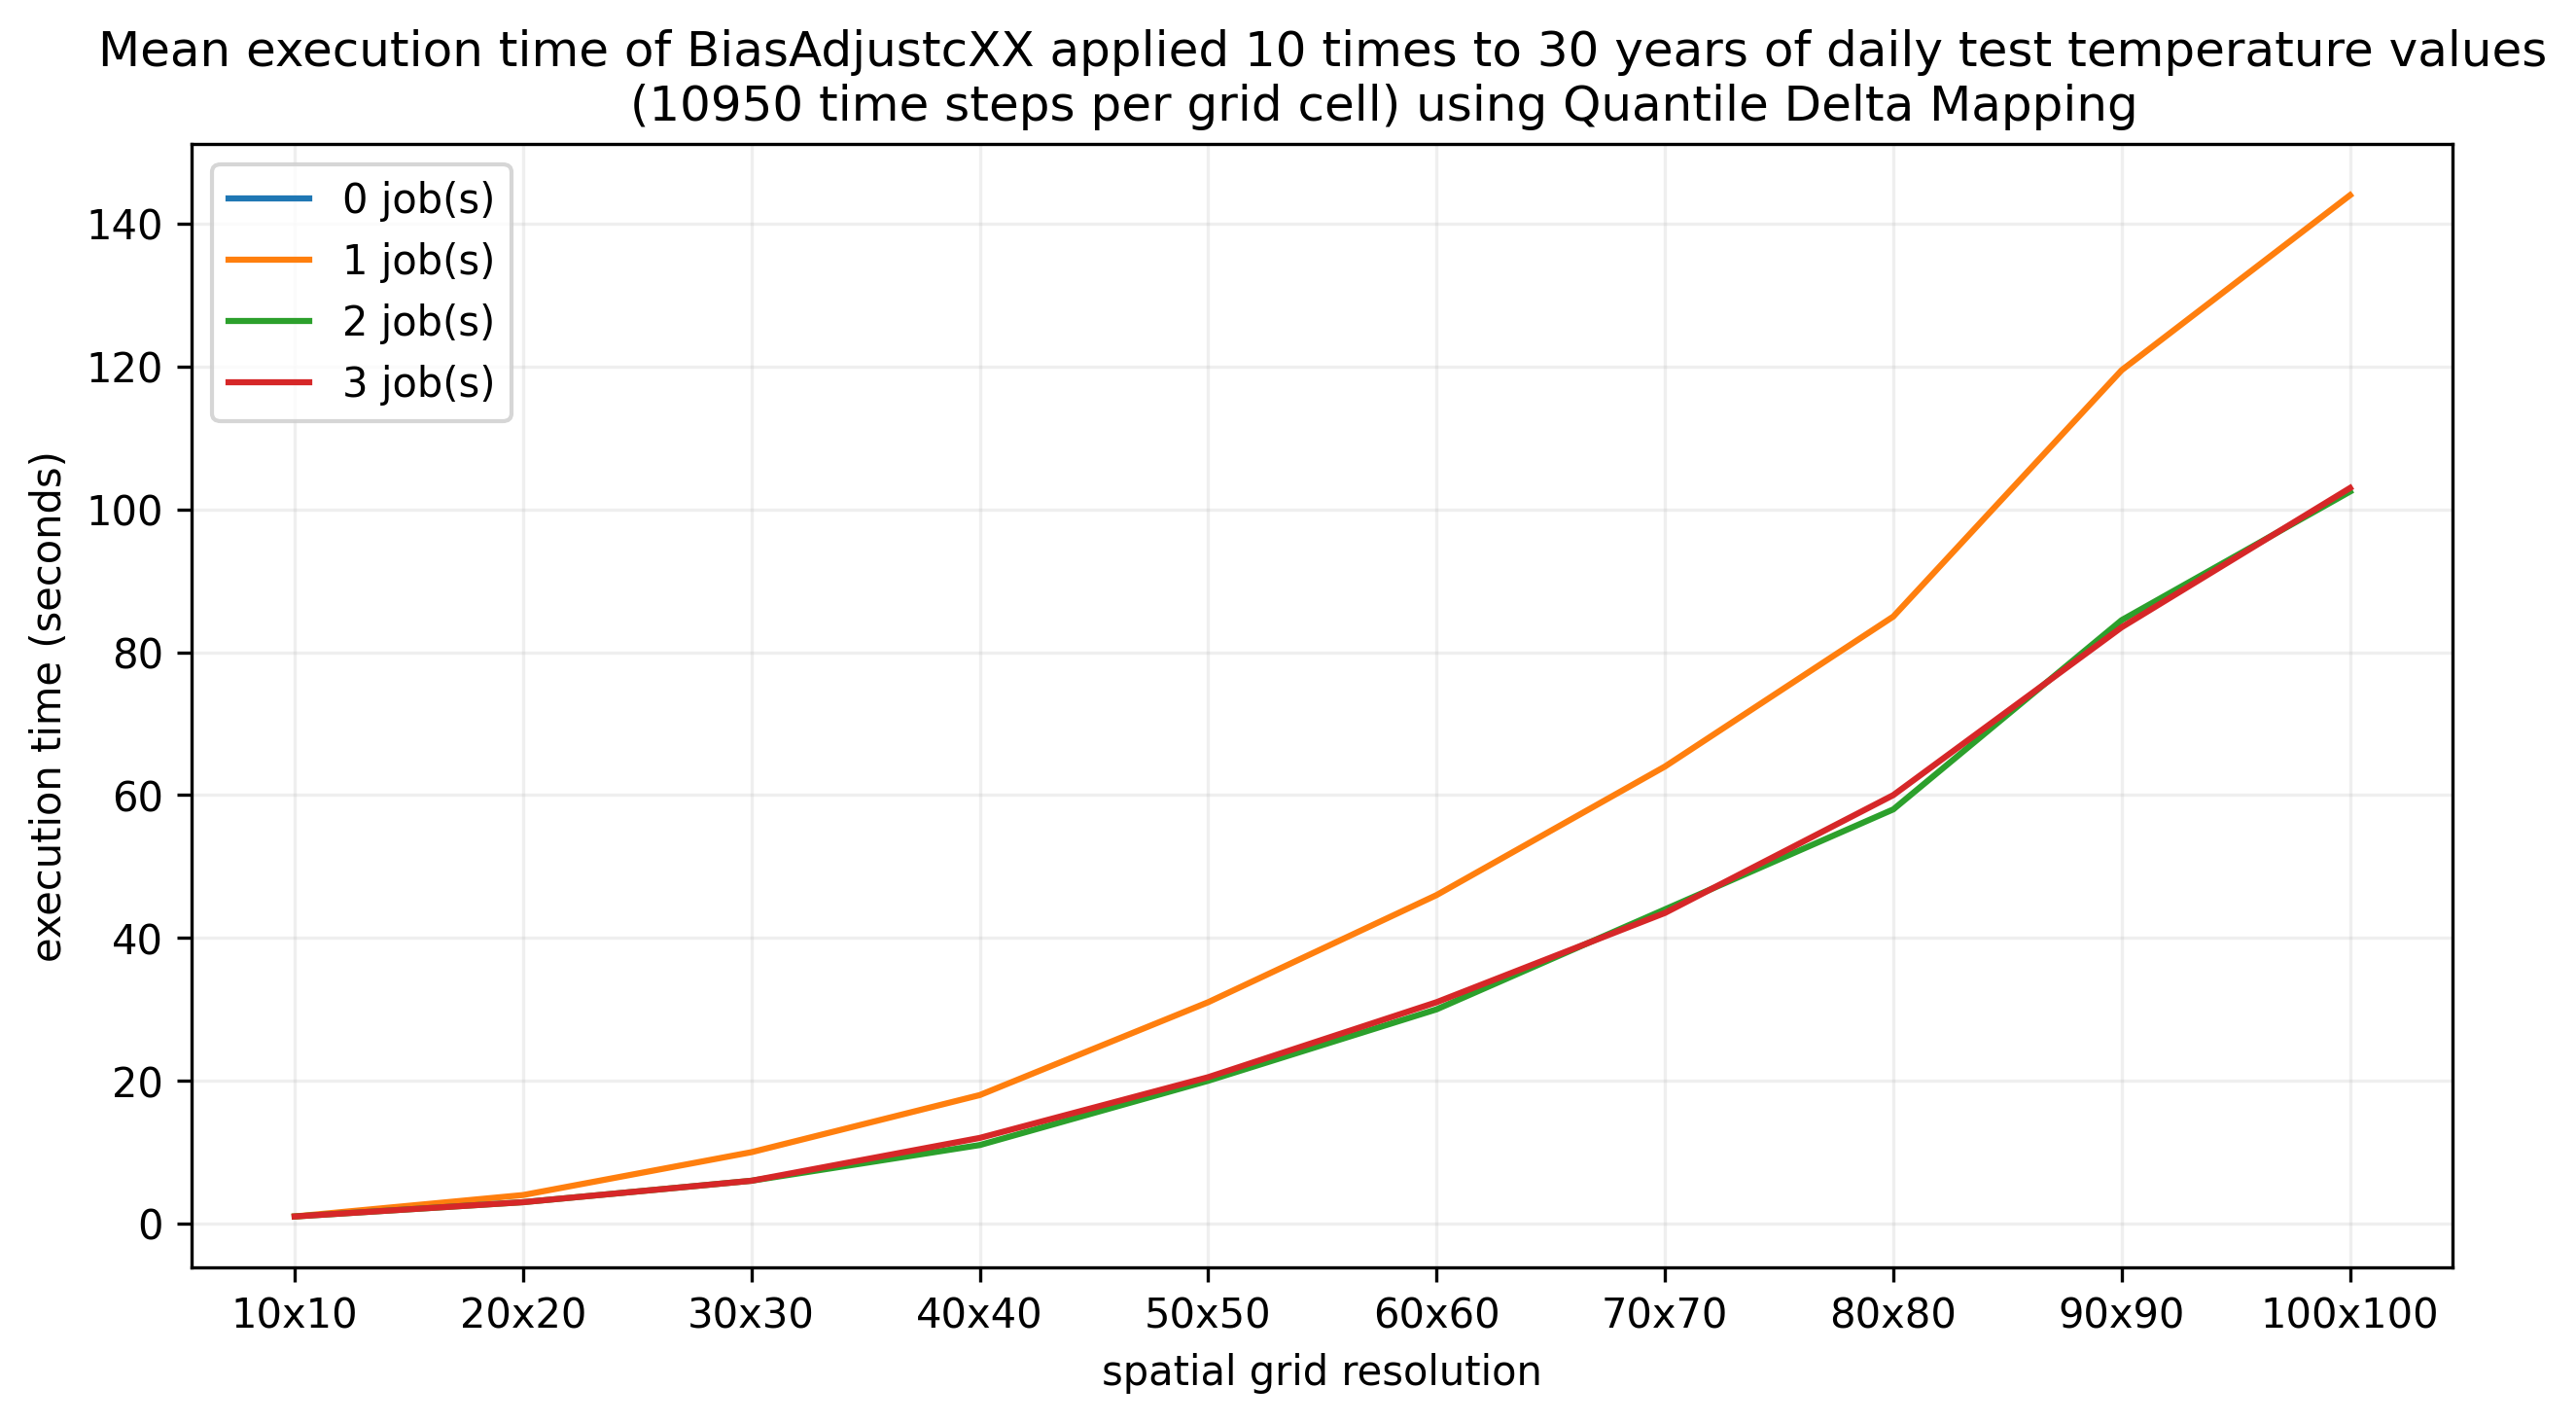

In [86]:
plot_multiple_threds(data=cxx_qdm, method='Quantile Delta Mapping')

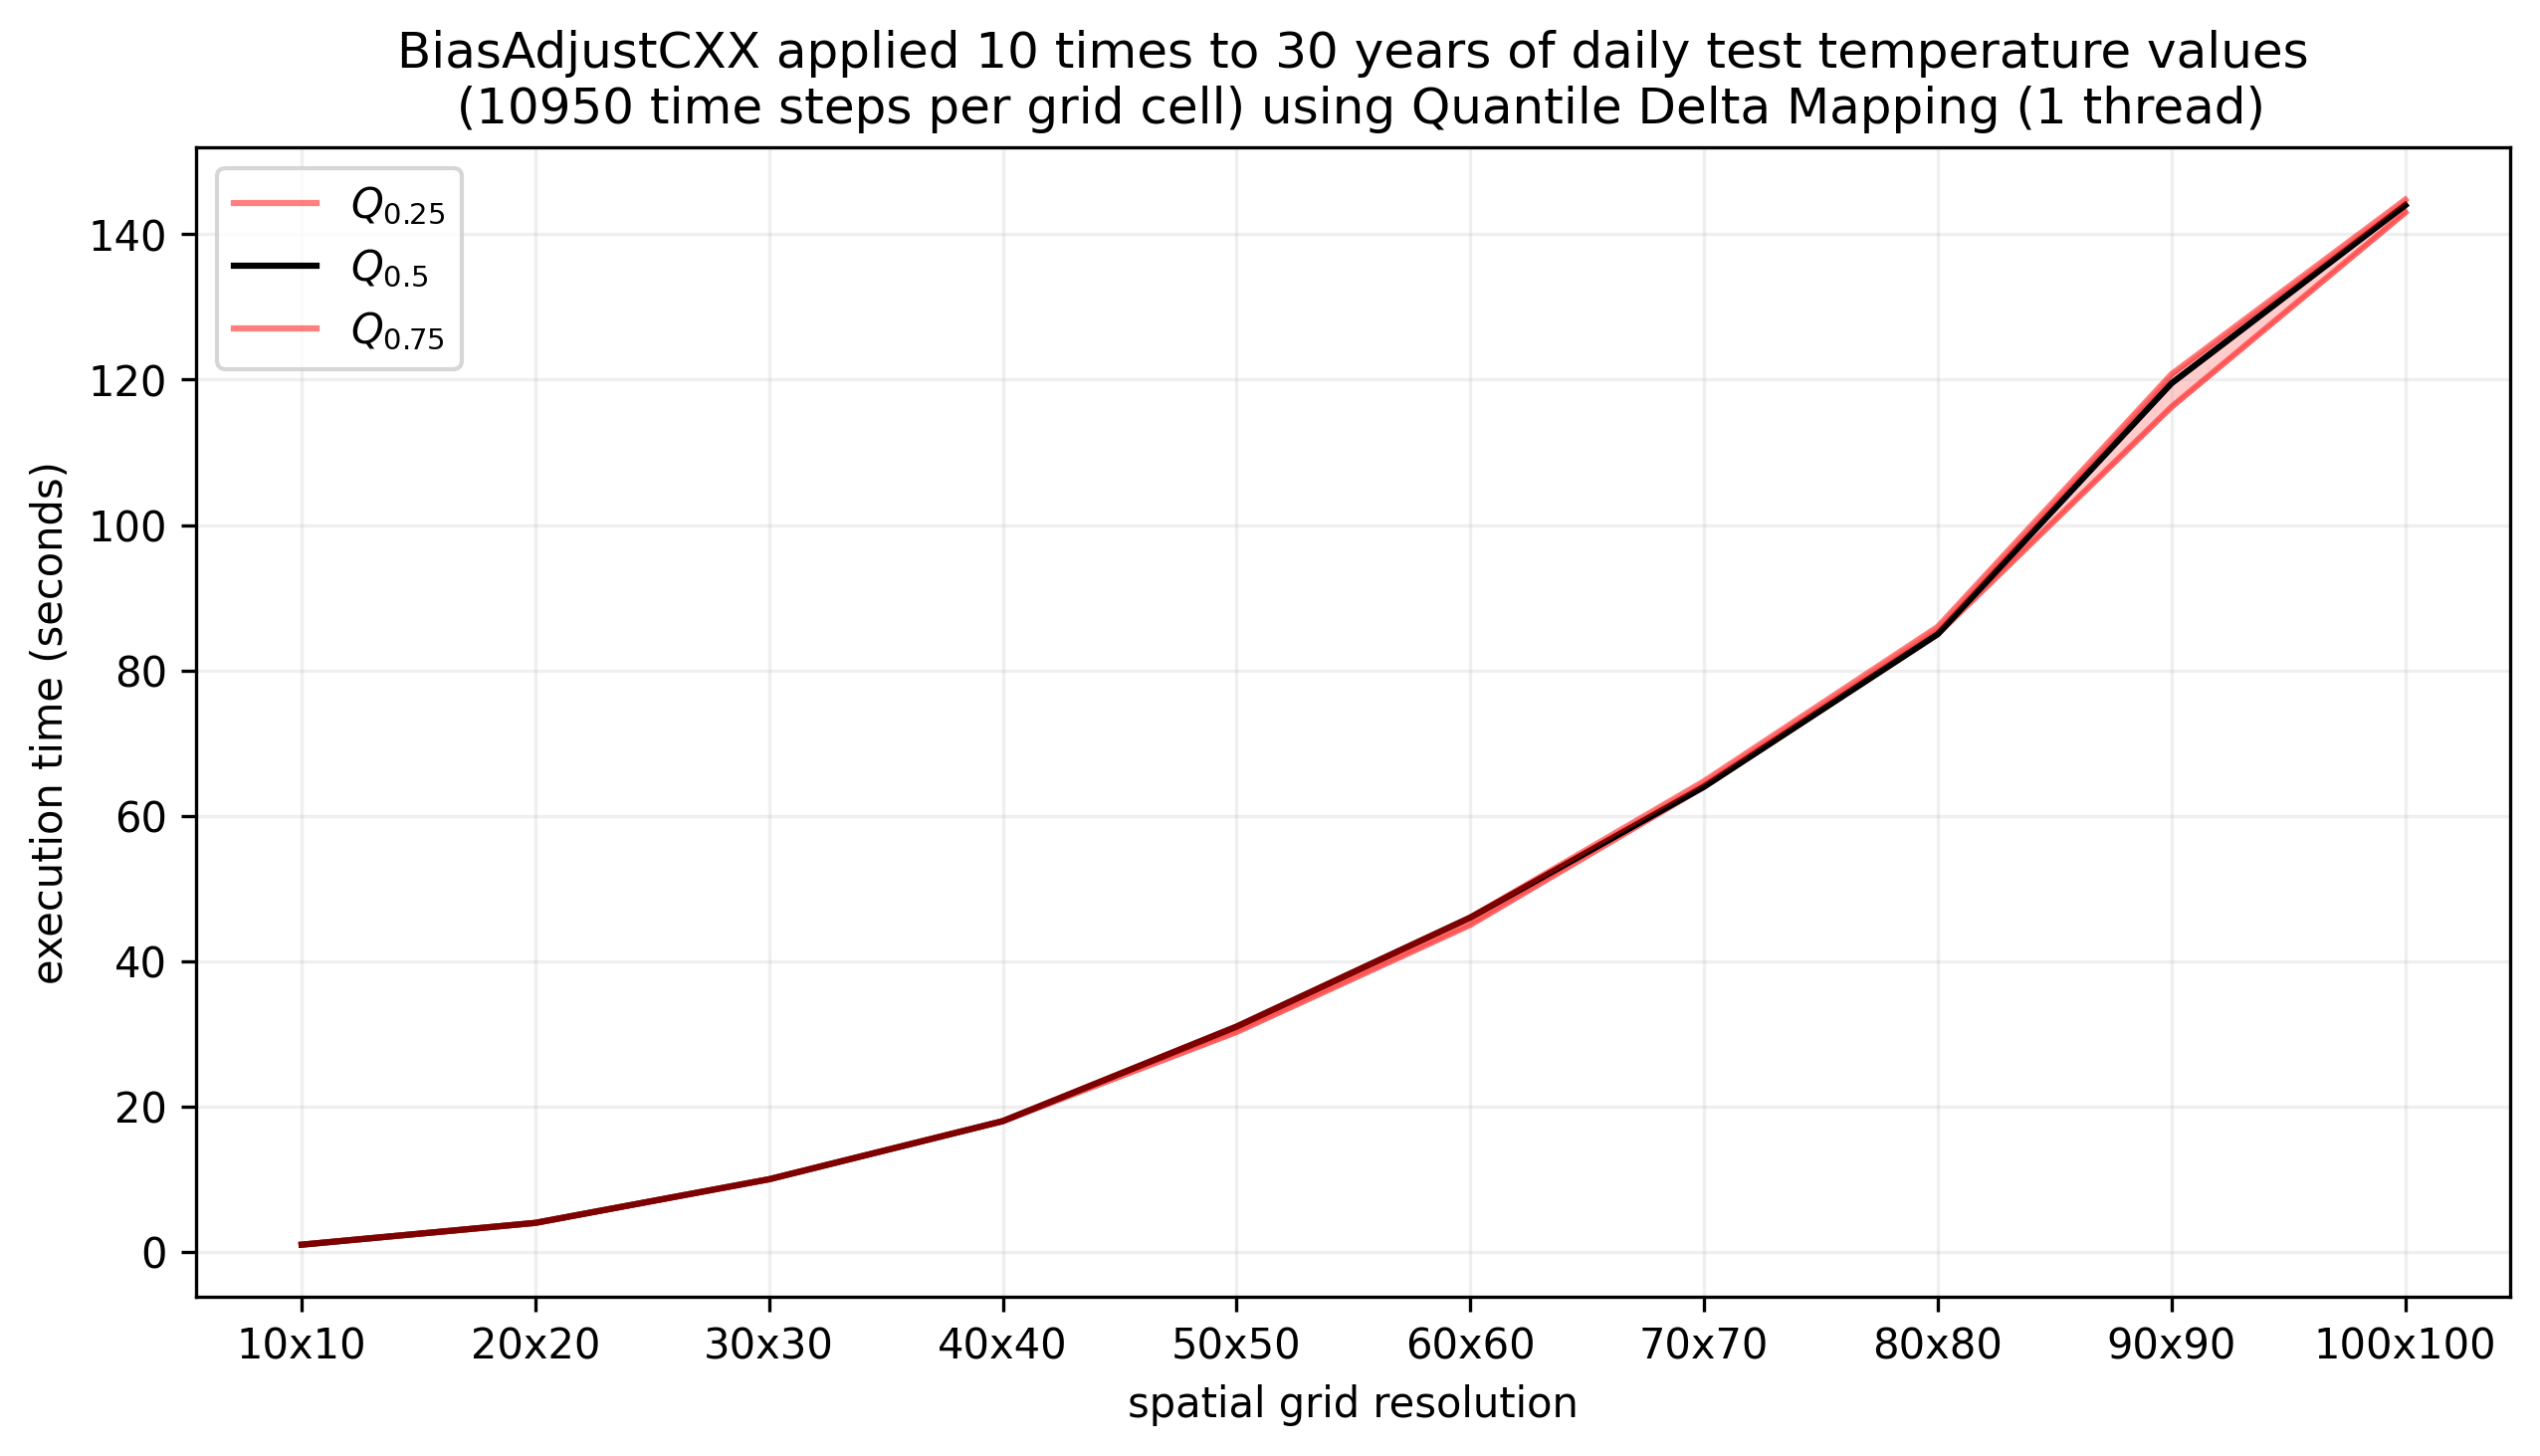

In [87]:
plot_1thread_quantile(data=cxx_qdm, method='Quantile Delta Mapping')

As has been shown, the time in which a dataset can be adjusted with `BiasAdjustCXX` varies almost not at all and always ensures stable runtimes.

<a name="evaluate-xclim"></a>
### 4.2 Results of xclim v0.40.0 (QDM)

QDM in `xlclim` clearly needs much more time to calculate the corrected time series than `python-cmethods` or `biasadjustcxx`. This is probably also due to the fact that a model is trained in the first step:
(see: [xclim v0.40.0 Github Empirical Quantile Mapping class + train method](https://github.com/Ouranosinc/xclim/blob/8868539166b20b7c95f8c47ca80e9c0226723514/xclim/sdba/adjustment.py#L348-L386)
and after that the adjustment is made:
(see [xclim v0.40.0 Github QDM adjust method](https://github.com/Ouranosinc/xclim/blob/8868539166b20b7c95f8c47ca80e9c0226723514/xclim/sdba/adjustment.py#L502-L557). (note: the QuantileDeltaMapping class inherits from EmpiricalQuantileMapping)

These training and subsequently adapted in `scripts/run_xclim.sh` of this repository.

An official example of this can be found here under the item "initializing an adjustment object from a training dataset:
https://xclim.readthedocs.io/en/stable/notebooks/sdba-advanced.html

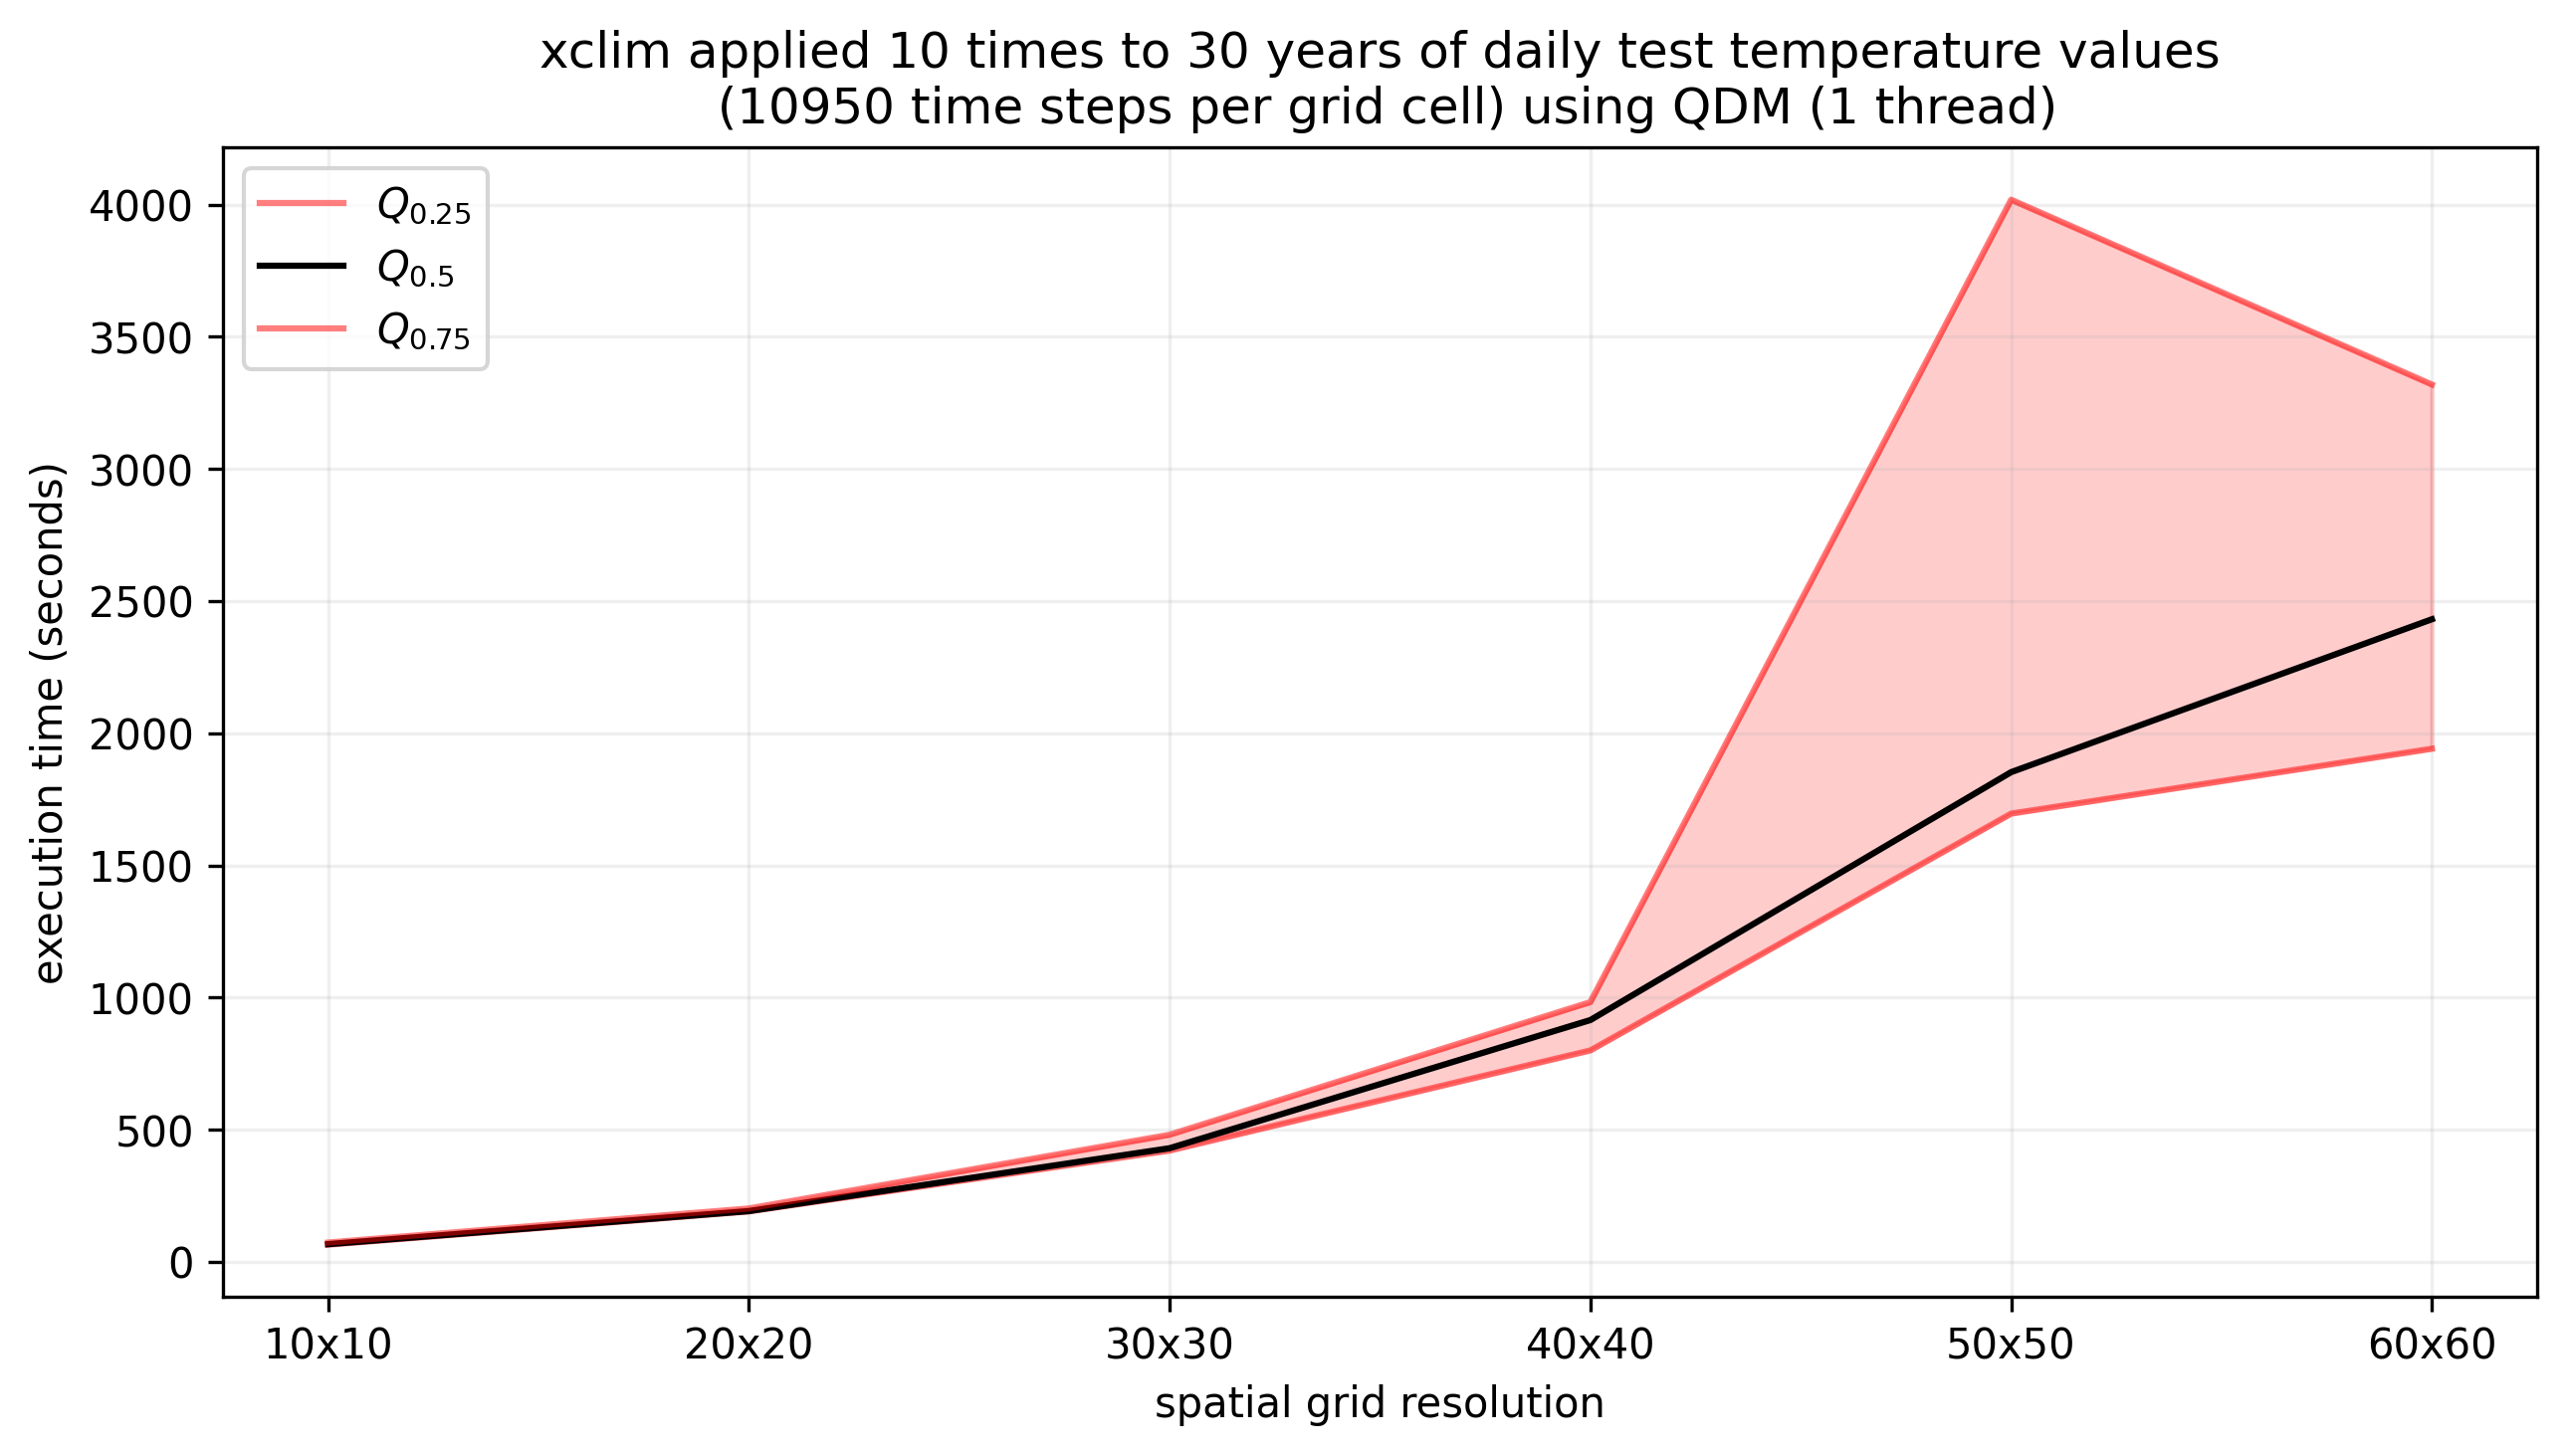

In [25]:
plt.figure(figsize=(10,5), dpi=300)

ax = plt.gca()

qdm_25 = xclim_qdm.groupby('resolution').quantile(.25)
qdm_50 = xclim_qdm.groupby('resolution').quantile(.5)
qdm_75 = xclim_qdm.groupby('resolution').quantile(.75)

v = 'time (seconds)'

qdm_25[v].plot(ax=ax, color='red', alpha=.5)
qdm_50[v].plot(ax=ax, color='black')
qdm_75[v].plot(ax=ax, color='red', alpha=.5)

ax.fill_between(np.arange(0,6,1),list(qdm_25[v]), list(qdm_75[v]), color='red', alpha=.2)
ax.legend([ '$Q_{0.25}$', '$Q_{0.5}$', '$Q_{0.75}$' ]);

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.set_xticklabels([f'{x}x{x}' for x in range(0,101,10)])
plt.grid(alpha=.2)

plt.ylabel('execution time (seconds)')
plt.xlabel('spatial grid resolution')
plt.title('xclim applied 10 times to 30 years of daily test temperature values\n (10950 time steps per grid cell) using QDM (1 thread)');

<a name="evaluate-pycmethods"></a>
### 4.3 Results of python-cmethods v0.6.1 (QM and QDM)

For the "python-cmethods" module, the quantile mapping and the quantile delta mapping procedures were applied 10 times each, since the execution time is subject to a high variance. Why this is so, could not be found out yet. 

In the following, the 0.25, 0.5 and 0.75 quantile for QM is shown.

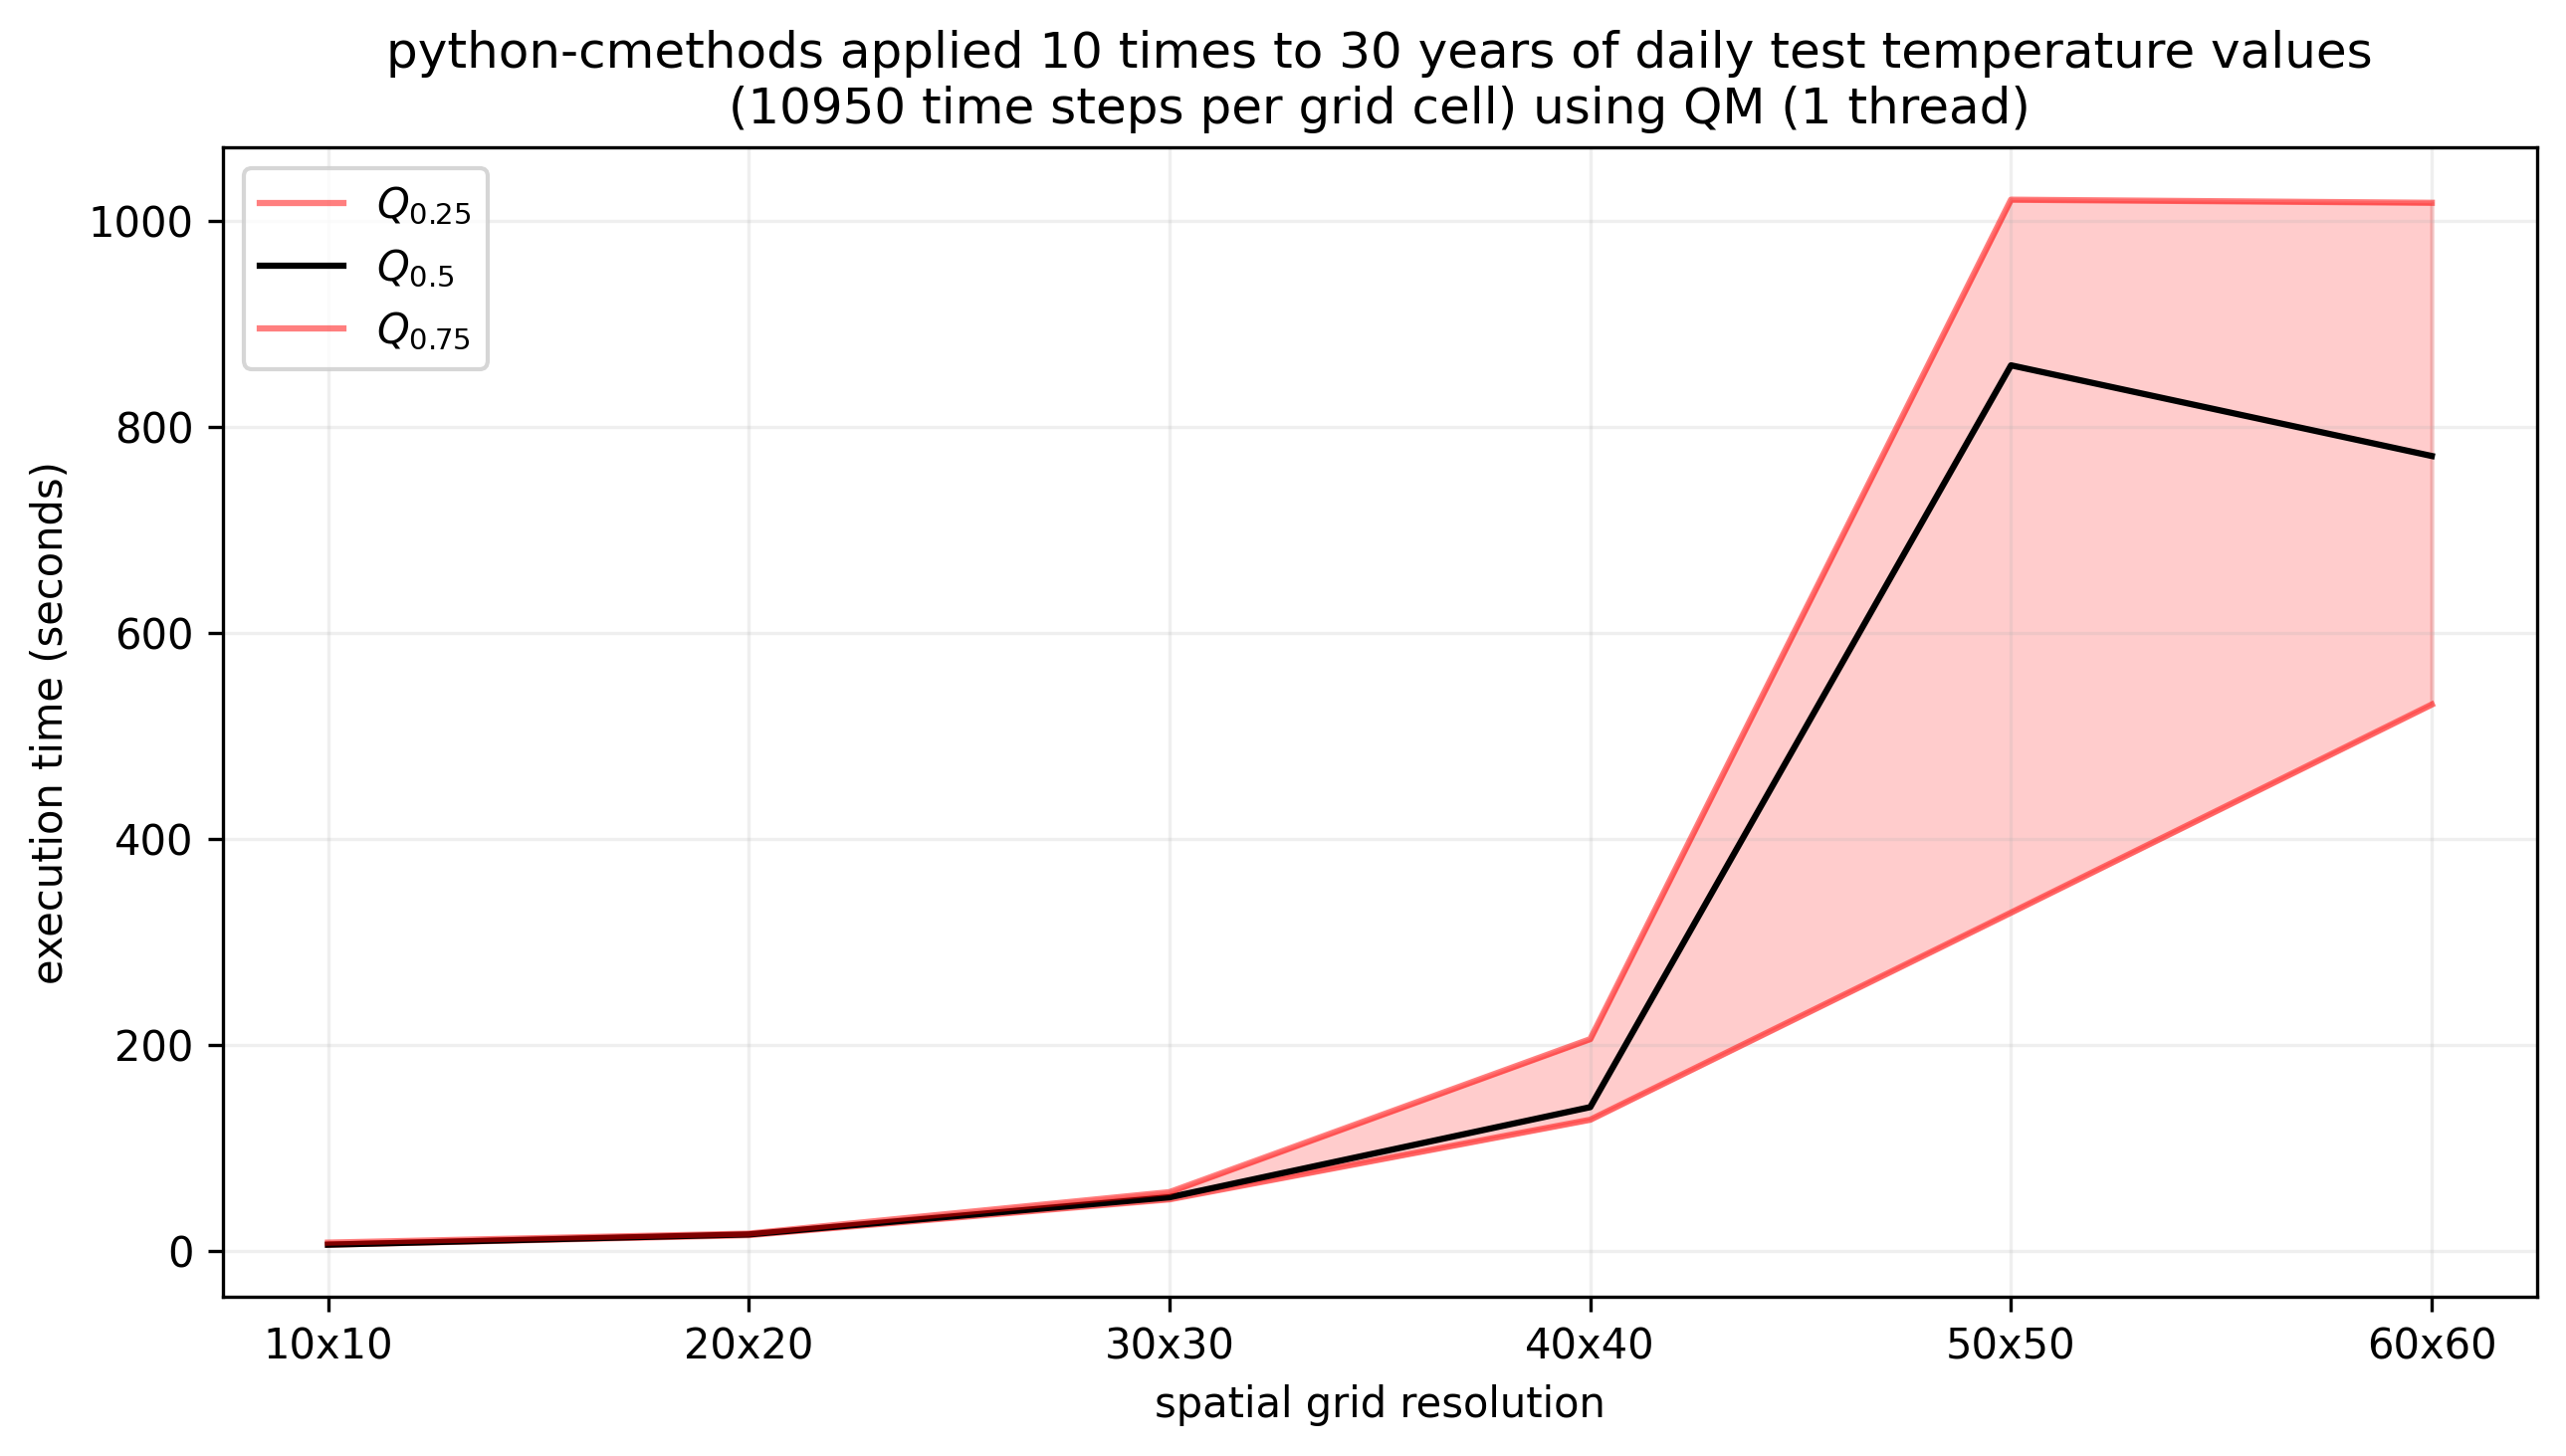

In [26]:
plt.figure(figsize=(10,5), dpi=300)

ax = plt.gca()
qm_25 = pycmethods_qm.groupby('resolution').quantile(.25)
qm_50 = pycmethods_qm.groupby('resolution').quantile(.5)
qm_75 = pycmethods_qm.groupby('resolution').quantile(.75)

v = 'time (seconds)'

qm_25[v].plot(ax=ax, color='red', alpha=.5)
qm_50[v].plot(ax=ax, color='black')
qm_75[v].plot(ax=ax, color='red', alpha=.5)

ax.fill_between(np.arange(0,6,1),list(qm_25[v]), list(qm_75[v]), color='red', alpha=.2)
ax.legend([ '$Q_{0.25}$', '$Q_{0.5}$', '$Q_{0.75}$' ]);

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.set_xticklabels([f'{x}x{x}' for x in range(0,101,10)])
plt.grid(alpha=.2)

plt.ylabel('execution time (seconds)')
plt.xlabel('spatial grid resolution')
plt.title('python-cmethods applied 10 times to 30 years of daily test temperature values\n(10950 time steps per grid cell) using QM (1 thread)');


With a resolution of 50 x 50 grid cells (time-series) with 10950 values each, the variance of the execution time seems to increase a lot with the QM. 

This is also the case with the QDM, but here it is more decent:

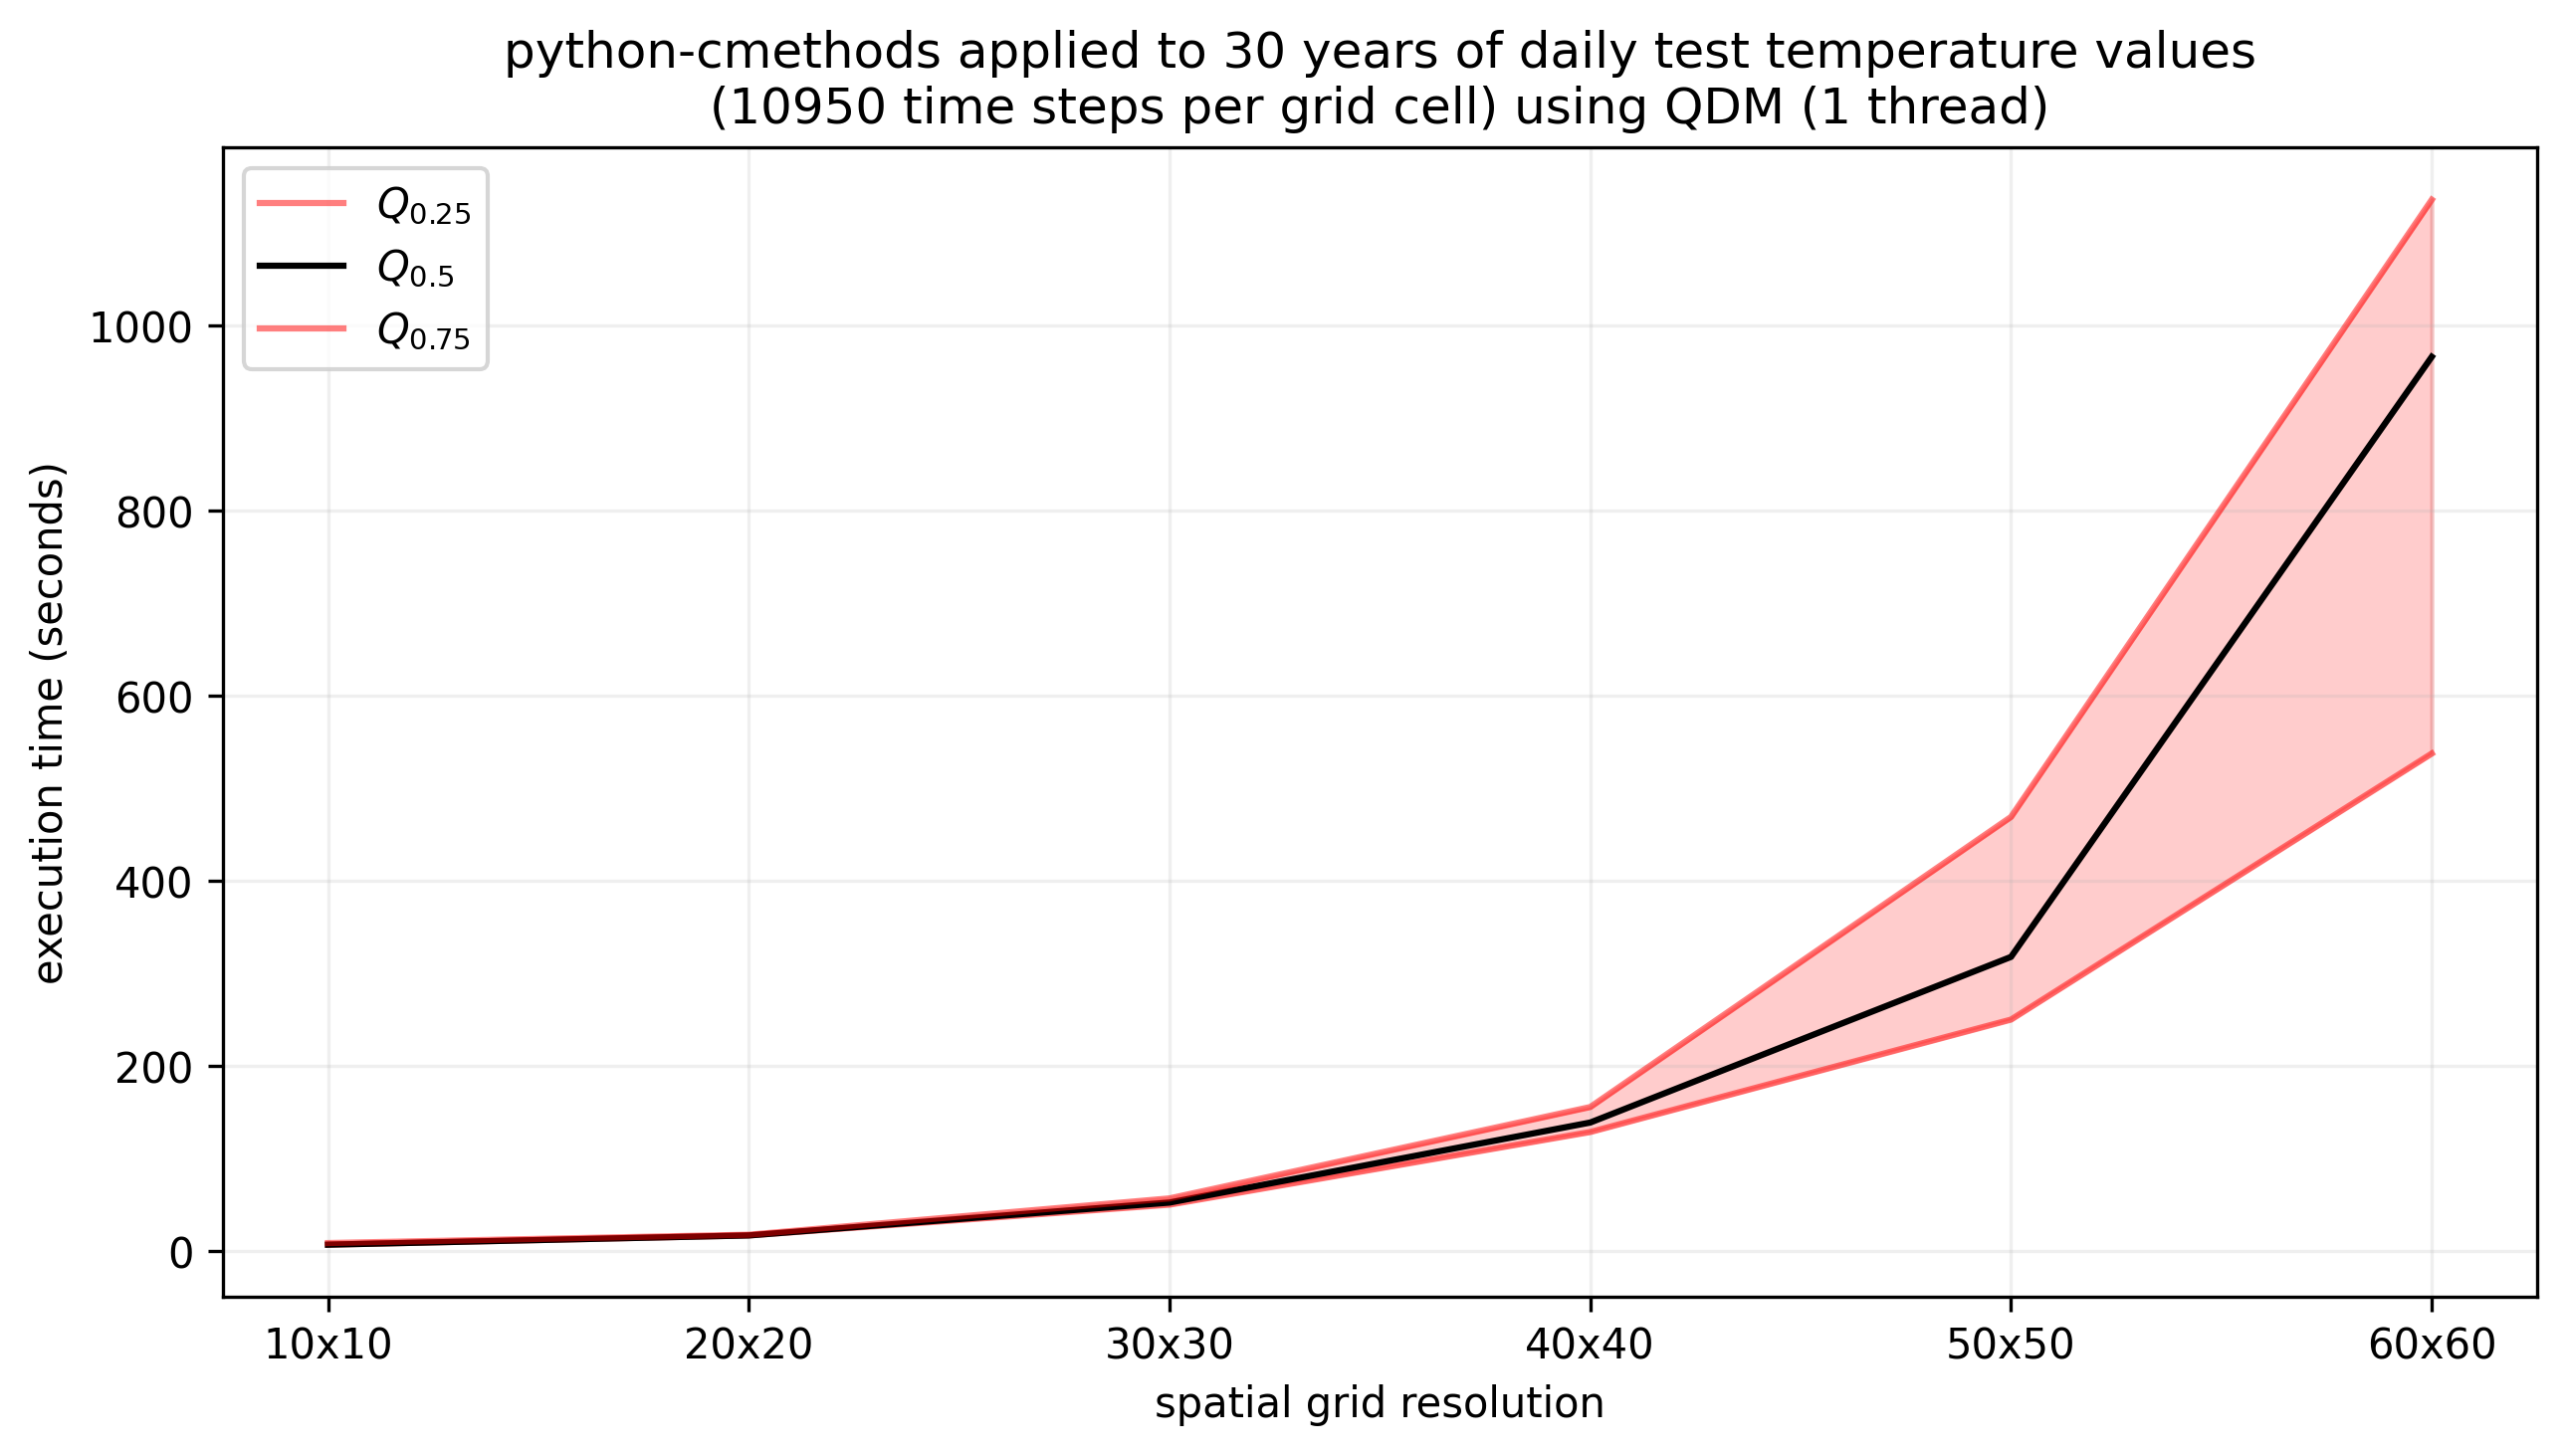

In [28]:
plt.figure(figsize=(10,5), dpi=300)

ax = plt.gca()
qdm_25 = pycmethods_qdm.groupby('resolution').quantile(.25)
qdm_50 = pycmethods_qdm.groupby('resolution').quantile(.5)
qdm_75 = pycmethods_qdm.groupby('resolution').quantile(.75)

v = 'time (seconds)'

qdm_25[v].plot(ax=ax, color='red', alpha=.5)
qdm_50[v].plot(ax=ax, color='black')
qdm_75[v].plot(ax=ax, color='red', alpha=.5)

ax.fill_between(np.arange(0,6,1),list(qdm_25[v]), list(qdm_75[v]), color='red', alpha=.2)
ax.legend([ '$Q_{0.25}$', '$Q_{0.5}$', '$Q_{0.75}$' ]);

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.set_xticklabels([f'{x}x{x}' for x in range(0,101,10)])
plt.grid(alpha=.2)

plt.ylabel('execution time (seconds)')
plt.xlabel('spatial grid resolution')
plt.title('python-cmethods applied to 30 years of daily test temperature values\n(10950 time steps per grid cell) using QDM (1 thread)');

<a name="comp-results"></a>
### 4.4 Comparison of the execution time of QDM

Lets compare the results:

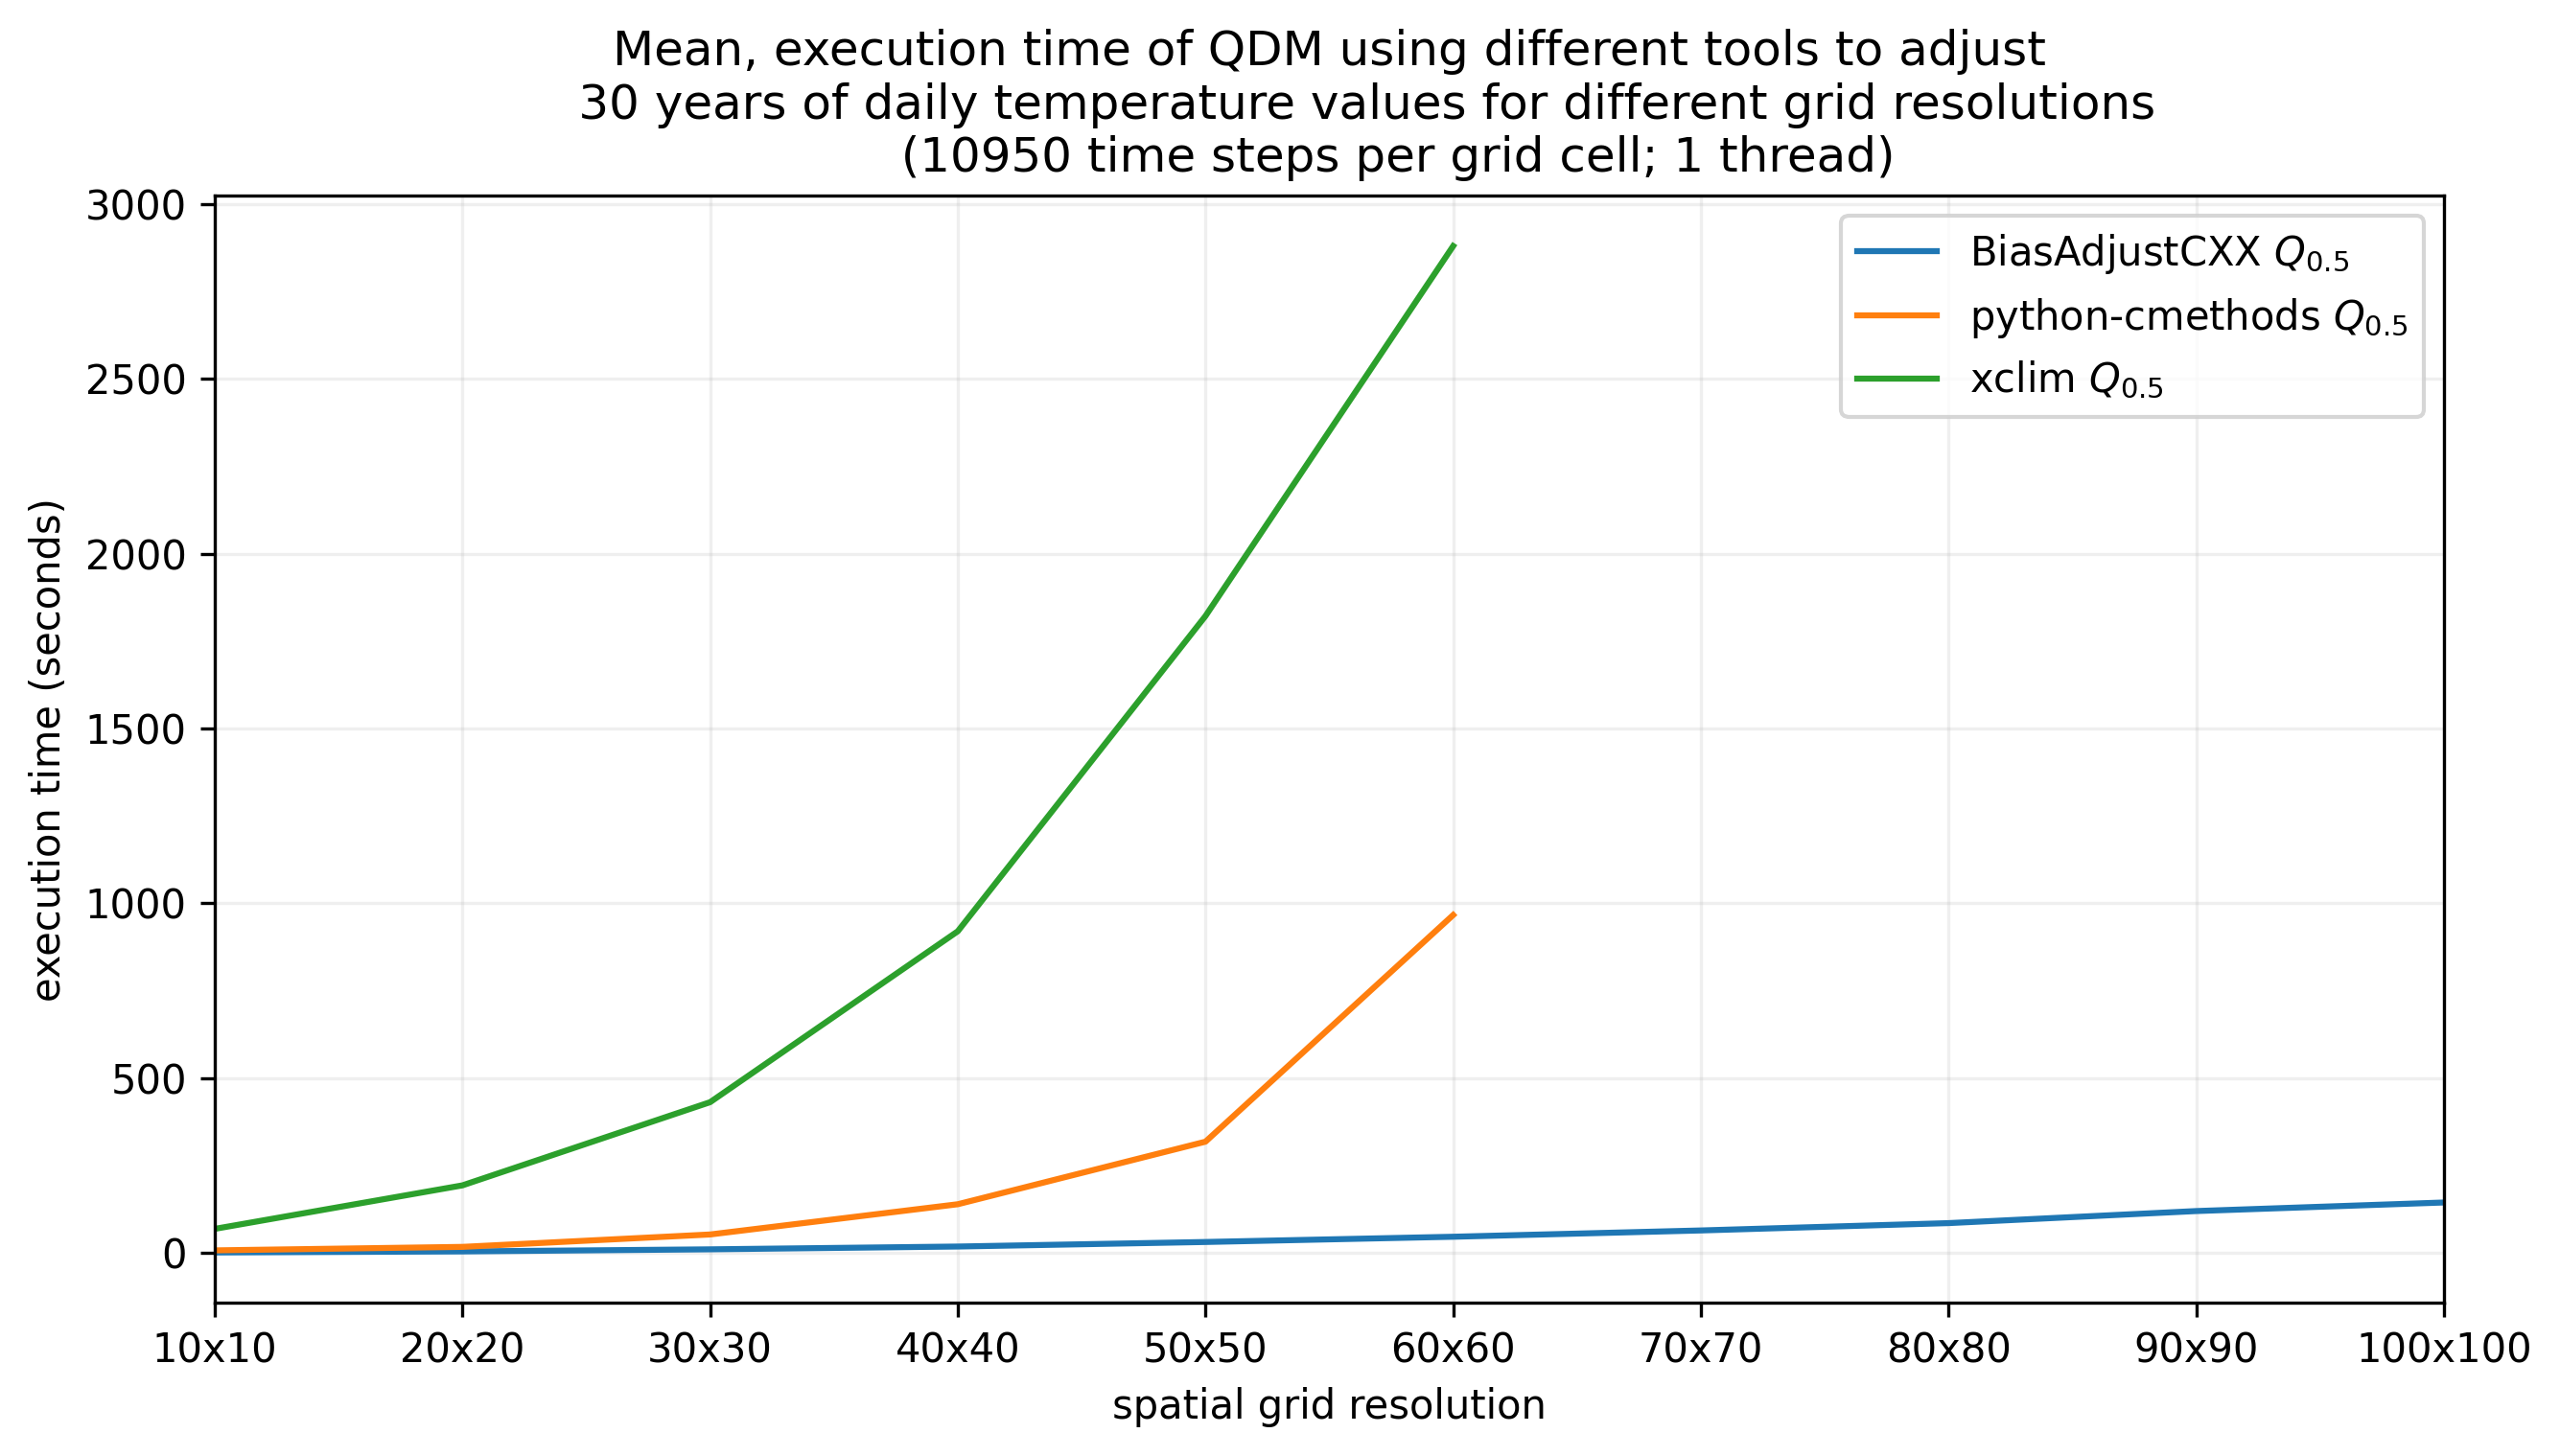

In [64]:
plt.figure(figsize=(10,5), dpi=300)

ax = plt.gca()
biasadjustcxx_qdm_q05 = cxx_qdm.where(cxx_qdm['jobs'] == 1).groupby('resolution').quantile(.5)
biasadjustcxx_qdm_q05 = biasadjustcxx_qdm_q05.tail(-1).append(biasadjustcxx_qdm_q05.iloc[0]) # 100x100 must be shifted to the end
biasadjustcxx_qdm_q05.plot(y='time (seconds)', ax=ax)

pycmethods_qdm_q05 = pycmethods_qdm.groupby('resolution').quantile(.5)
pycmethods_qdm_q05.plot(ax=ax)

xclim_qdm_q05 = xclim_qdm.groupby('resolution').quantile(.5)
xclim_qdm_q05.plot(ax=ax)

ax.legend([ 'BiasAdjustCXX $Q_{0.5}$', 'python-cmethods $Q_{0.5}$', 'xclim $Q_{0.5}$' ]);
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.set_xticklabels([f'{x}x{x}' for x in range(0,101,10)])
plt.grid(alpha=.2)

ax.set_xlim(0,9)

plt.ylabel('execution time (seconds)')
plt.xlabel('spatial grid resolution')
plt.title('Mean, execution time of QDM using different tools to adjust\n \
    30 years of daily temperature values for different grid resolutions\n \
        (10950 time steps per grid cell; 1 thread)');


It can be clearly seen that the tool `xclim` needs considerably more time to adjust the time series. `python-cmethods` achieves significantly better results here, even though the execution time also increases strongly here with increasing grid resolution. However, both tools have difficulties with higher resolutions, so that the time is not only extremely prolonged, but both calculations seem to come to a standstill during execution, but do not terminate automatically. Thus, it was observed that at a resolution of 70x70, they were no longer able to perform the correction. Possibly this is due to the fact that for example in `xclim` and `python-cmethods` the complete datasets are loaded into memory. 
    
With BiasAdjustCXX this is not the case, because within this implementation only all time series of all latitudes of one longitude line are loaded into the memory at the same time. So there is no 'BiasAdjustCXX' no problem at all. Here also larger data sets can be adjusted, so that a data set with a grid resolution of 100x100 (10000 time seiries with 10950 values each) needs only somewhat more than one minute.  

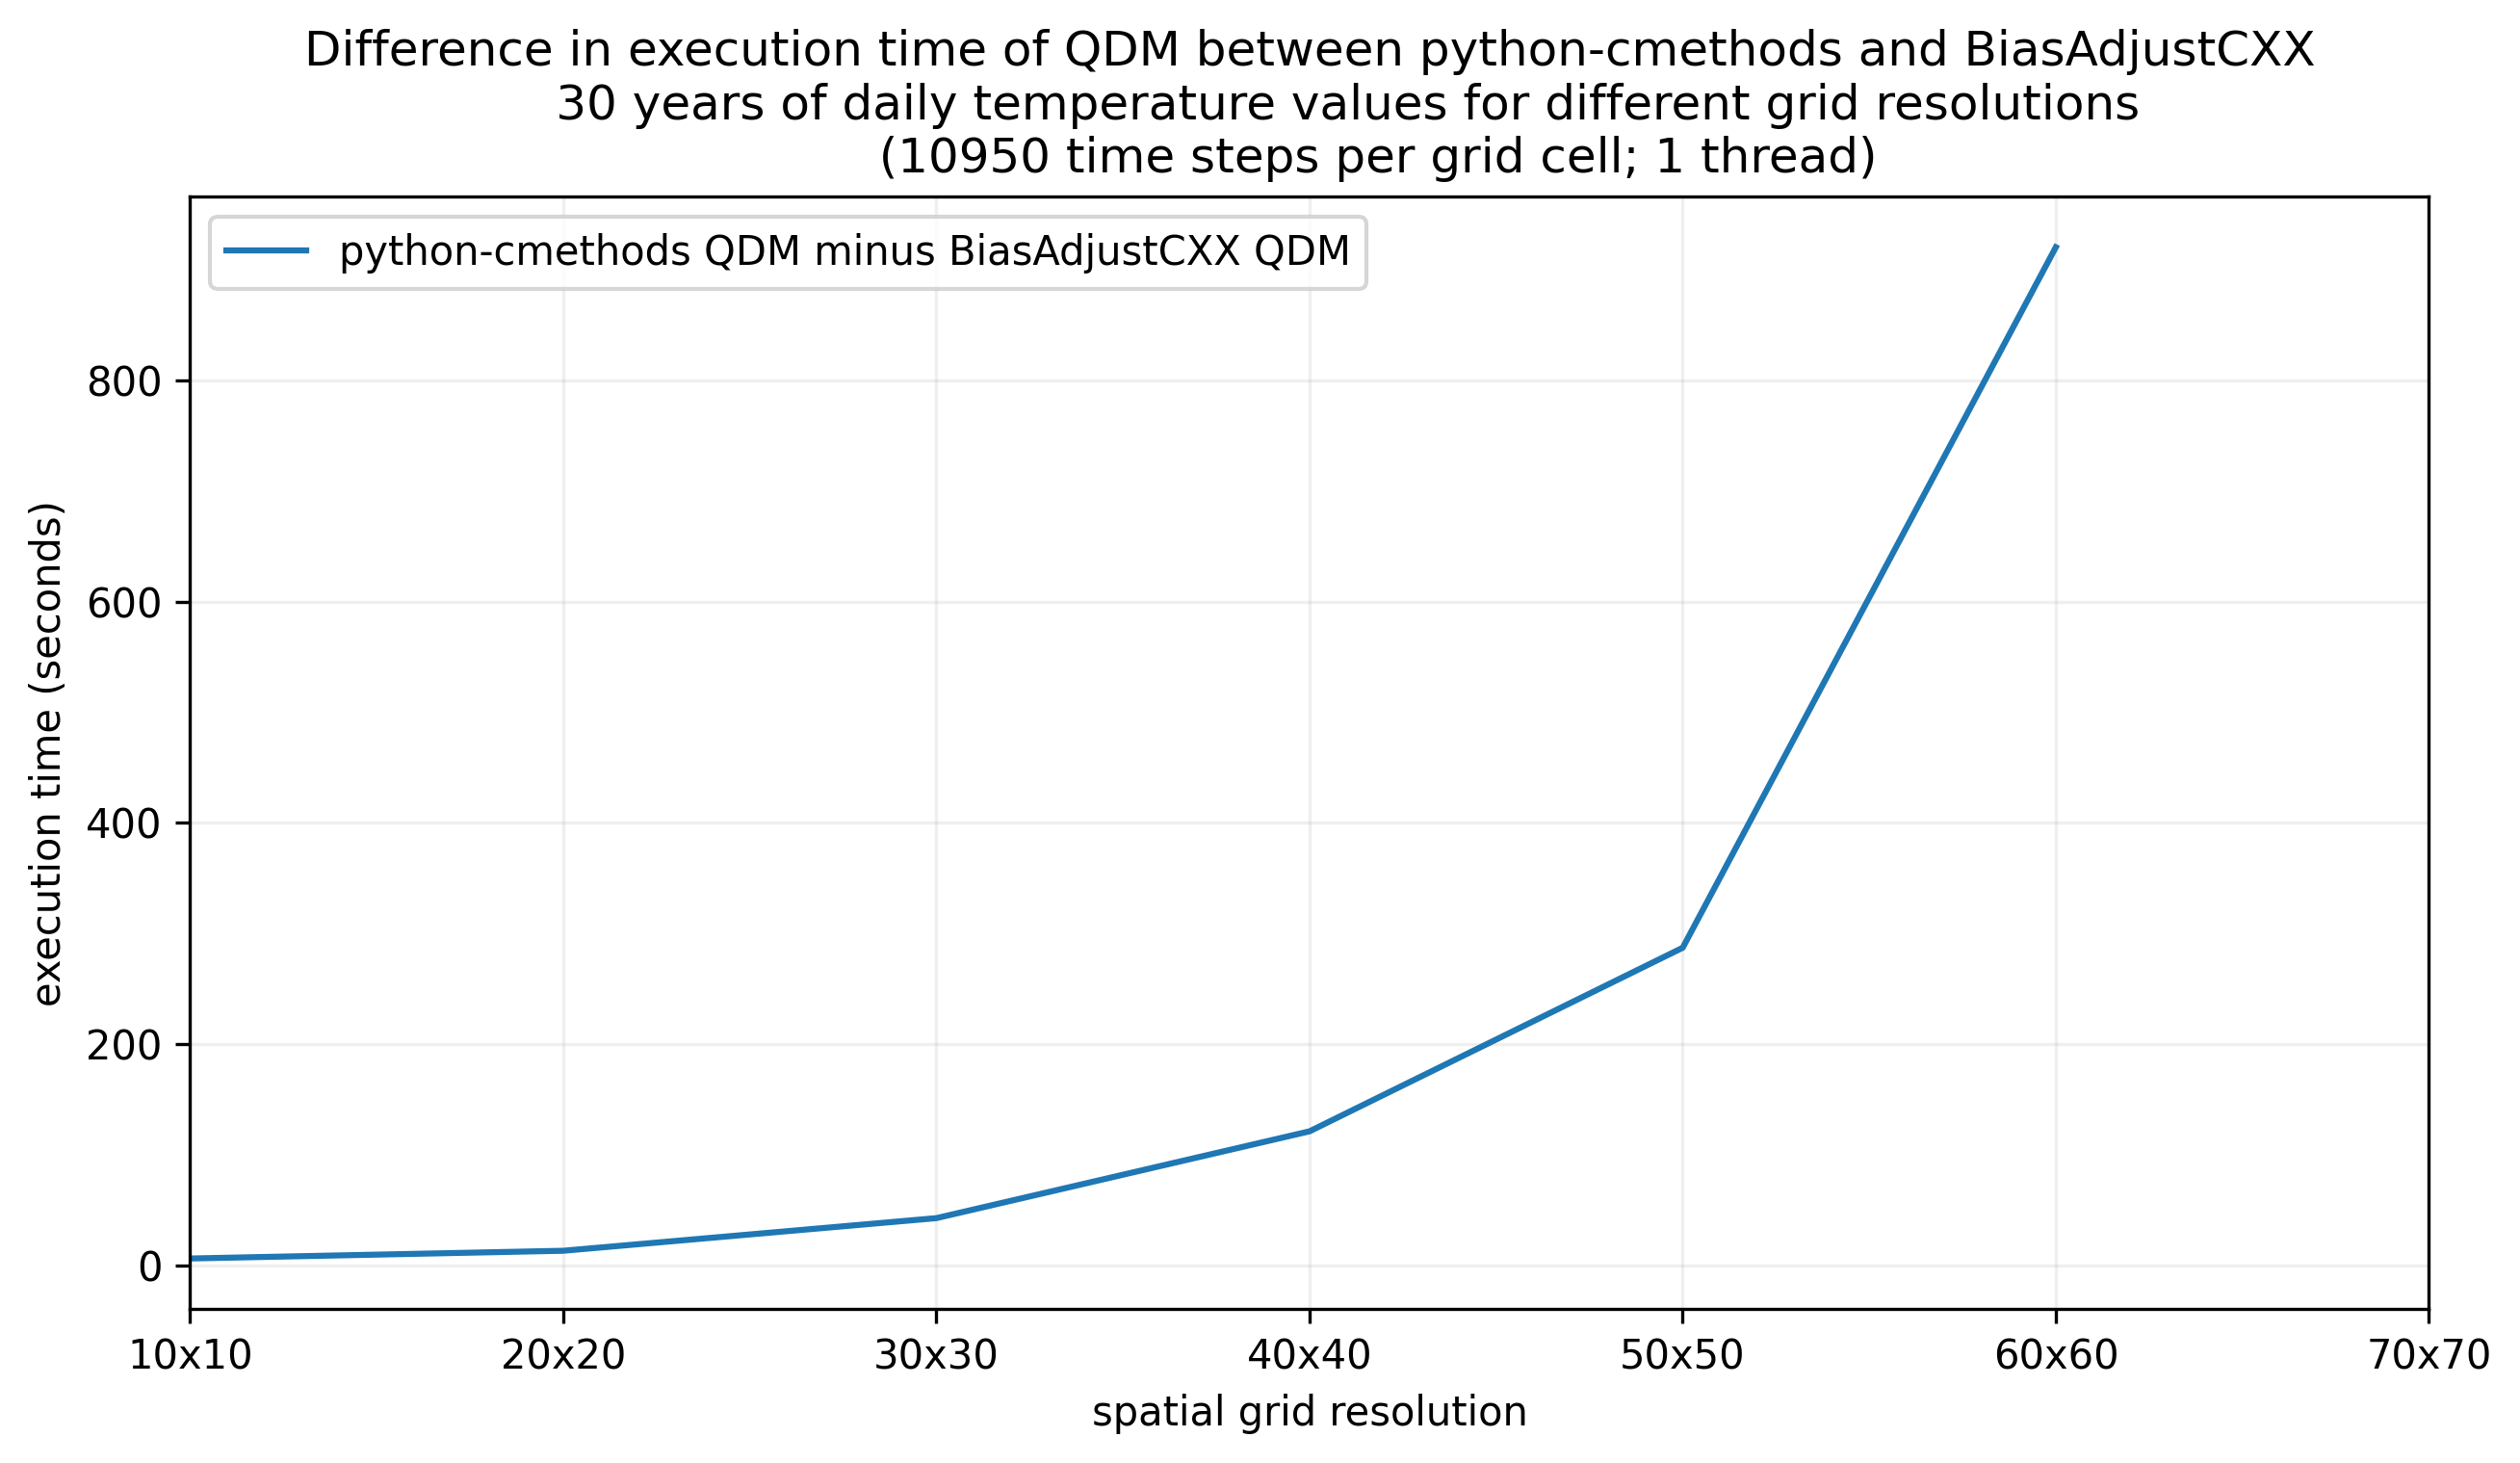

In [65]:
plt.figure(figsize=(10,5), dpi=300)

ax = plt.gca()

(pycmethods_qdm_q05['time (seconds)'] - biasadjustcxx_qdm_q05['time (seconds)'].head(6)).plot(ax=ax)

ax.legend(['python-cmethods QDM minus BiasAdjustCXX QDM']);
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.set_xticklabels([f'{x}x{x}' for x in range(0,101,10)])
plt.grid(alpha=.2)

ax.set_xlim(0,6)

plt.ylabel('execution time (seconds)')
plt.xlabel('spatial grid resolution')
plt.title('Difference in execution time of QDM between python-cmethods and BiasAdjustCXX\n \
    30 years of daily temperature values for different grid resolutions\n \
        (10950 time steps per grid cell; 1 thread)');


In the plot above it can be clearly seen that with increasing resolution of the data sets, the `BiasAdjustCXX` tool has a significantly lower execution time than `python-cmethods`.

<a name="conclusion"></a>

## 5. Conclusion

All three tools tested can be used for bias correction in climate science. It has been shown that `BiasAdjustCXX` can also process data sets with a high resolution without problems in contrast to the python modules. Also, the speed was not only significantly faster, but subject to much less variance than the python modules `xclim` and `python-cmethods`. The worst performer was `xclim`, where the execution time is always a multiple of `python-cmethods`. With increasing resolution, the execution time also increases in all tools, but it increases much faster in the python modules than in `BiasAdjustCXX`. 

The correction of small data sets works relatively fast with all tools, so that for data sets with a resolution of less than 30x30 (with 10950 values per grid celle) it does not matter which of the tools you use. However, if the adjustment of larger data sets is desired, the command-line tool `BiasAdjustCXX` is the winner in this comparison. Since it provides also flags to execute the computation using multiple threads, it can be even faster on machines with more power than my old MacBook Pro. Then it is also possible to adjust even larger data sets. It is assumed that because of the dual core processor on which these tests were run, no better results were produced by the BiasAdjustCXX tool when more than 2 jobs are used.